# Drug User Classification

Data from: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#

## Introduction
How can we identify those susceptible to drug use?

The following data provides information about demographic traits and personality traits of a person and connects it to whether or not they have used a certain drug. There are 17 drugs available in the study. With this information rehab clinics, hospitals, and others would be able to identify who may be at risk for certain types of drug use and abuse.

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
import cleaning
import data_prep
import helper_functions
import grid_search_functions
import modeling_functions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data Cleaning

In [2]:
# Clean dataframe
df = cleaning.cleaner('drug_consumption.txt')
df.head()

Age  Gender    Education_level Country          Ethnicity  \
0  35-44  Female  Associates degree      UK  Mixed-White/Asian   
1  25-34    Male   Doctorate degree      UK              White   
2  35-44    Male  Associates degree      UK              White   
3  18-24  Female     Masters degree      UK              White   
4  35-44  Female   Doctorate degree      UK              White   

   Neuroticism_score  Extraversion_score  Openness_score  Agreeableness_score  \
0                 39                  36              42                   37   
1                 29                  52              55                   48   
2                 31                  45              40                   32   
3                 34                  34              46                   47   
4                 43                  28              43                   41   

   Conscientiousness_score  ...  Ecstacy  Heroin  Ketamine  Legal_highs  LSD  \
0                       42  ...        0       0         0            0    0   
1                       41  ...        1       0         1            0    1   
2                       34  ...        0       0         0            0    0   
3                       46  ...        0       0         1            0    0   
4                       50  ...        0       0         0            0    0   

   Meth  Mushrooms  Nicotine  Semer_fake_drug  Volatile_substance_abuse  
0     0          0         1                0                         0  
1     1          0         1                0                         0  
2     0          0         0                0                         0  
3     0          0         1                0                         0  
4     0          1         1                0                         0  

[5 rows x 31 columns]

In [3]:
# Create a copy of cleaned database for data analysis and insights later on
original_df = df.copy()

### Multicollinearity Checks

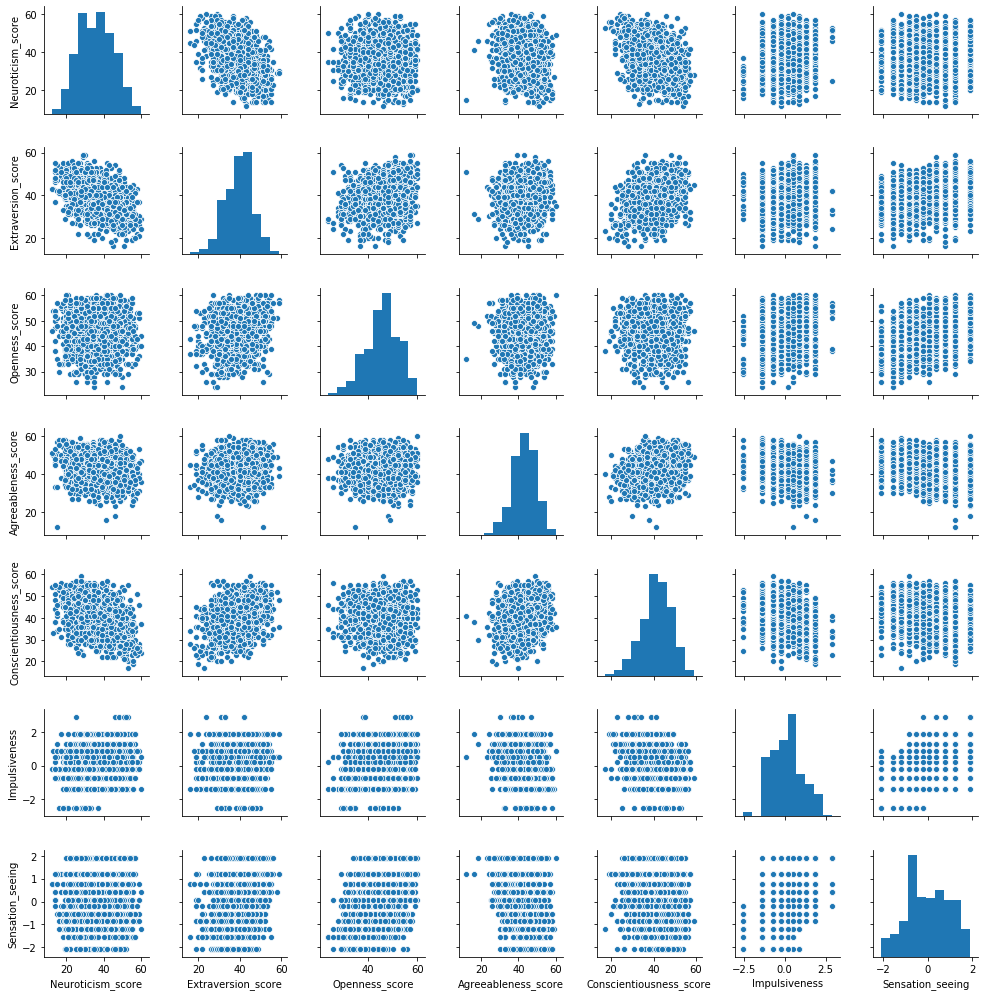

In [4]:
# Check pairplot of continuous variables
sns.pairplot(df.iloc[:, :12], size = 2);

In [5]:
# Check correlation of continuous variables
df.iloc[:, :12].corr() > .75

Neuroticism_score  Extraversion_score  \
Neuroticism_score                     True               False   
Extraversion_score                   False                True   
Openness_score                       False               False   
Agreeableness_score                  False               False   
Conscientiousness_score              False               False   
Impulsiveness                        False               False   
Sensation_seeing                     False               False   

                         Openness_score  Agreeableness_score  \
Neuroticism_score                 False                False   
Extraversion_score                False                False   
Openness_score                     True                False   
Agreeableness_score               False                 True   
Conscientiousness_score           False                False   
Impulsiveness                     False                False   
Sensation_seeing                  False                False   

                         Conscientiousness_score  Impulsiveness  \
Neuroticism_score                          False          False   
Extraversion_score                         False          False   
Openness_score                             False          False   
Agreeableness_score                        False          False   
Conscientiousness_score                     True          False   
Impulsiveness                              False           True   
Sensation_seeing                           False          False   

                         Sensation_seeing  
Neuroticism_score                   False  
Extraversion_score                  False  
Openness_score                      False  
Agreeableness_score                 False  
Conscientiousness_score             False  
Impulsiveness                       False  
Sensation_seeing                     True

### Data Preparation

In [8]:
# Prepare dataframe for analysis
df = data_prep.prep_data(df)
df.head()

Age_25-34  Age_35-44  Age_45-54  Age_55-64  Age_65+  Gender_Male  \
0          0          1          0          0        0            0   
1          1          0          0          0        0            1   
2          0          1          0          0        0            1   
3          0          0          0          0        0            0   
4          0          1          0          0        0            0   

   Education_level_17  Education_level_18  Education_level_< 16  \
0                   0                   0                     0   
1                   0                   0                     0   
2                   0                   0                     0   
3                   0                   0                     0   
4                   0                   0                     0   

   Education_level_Associates degree  ...  Cocaine  Crack  Ecstacy  Heroin  \
0                                  1  ...        0      0        0       0   
1                                  0  ...        1      0        1       0   
2                                  1  ...        0      0        0       0   
3                                  0  ...        1      0        0       0   
4                                  0  ...        0      0        0       0   

   Ketamine  Legal_highs  LSD  Meth  Mushrooms  Nicotine  
0         0            0    0     0          0         1  
1         1            0    1     1          0         1  
2         0            0    0     0          0         0  
3         1            0    0     0          0         1  
4         0            0    0     0          1         1  

[5 rows x 51 columns]

In [9]:
# Create drug dataframe names for next step
df_names = [x + '_df' for x in list(df.columns)[34:]]

In [10]:
# create dictionary with drug and drug specific dataframe
drug_dict = {}
for drug in df_names:
    drug_df = pd.DataFrame(df.iloc[:, :34]).merge(df[[drug[:-3]]], right_index = True, left_index = True)
    drug_dict[drug] = drug_df

### Data Exploration and Visualizations

In [13]:
total_drug_use_dict = {}
for key in drug_dict.keys():
    X, y = helper_functions.get_x_y(drug_dict[key])
    y_pos = y.target.value_counts()[1]
    drug_user_percent = round(y_pos/ len(y), 2)
    total_drug_use_dict[key[:-3]] = drug_user_percent

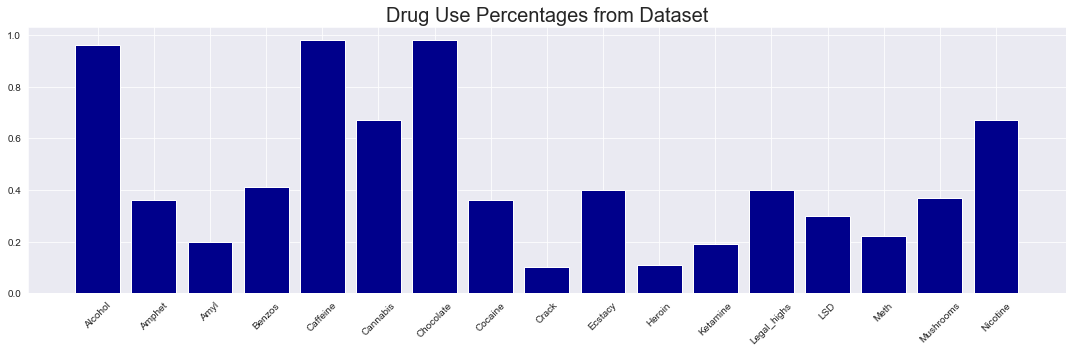

In [14]:
# Barplot of Drug Use Percentages
sns.set_style('darkgrid')
fig = plt.figure(figsize = (15,5))
plt.bar(range(len(total_drug_use_dict)), list(total_drug_use_dict.values()), align='center', color = 'darkblue')
plt.xticks(range(len(total_drug_use_dict)), list(total_drug_use_dict.keys()), rotation = 45)
plt.title('Drug Use Percentages from Dataset', fontsize = 20)
plt.tight_layout()
plt.savefig('Data_Visualizations/drug_use_percentage.png')
plt.show()

In [15]:
# Number of participants who claimed to use fake drug
original_df.Semer_fake_drug.value_counts(normalize = True)

0    0.996817
1    0.003183
Name: Semer_fake_drug, dtype: float64

In [16]:
# Male/Female
original_df.Gender.value_counts(normalize = True)

Male      0.500265
Female    0.499735
Name: Gender, dtype: float64

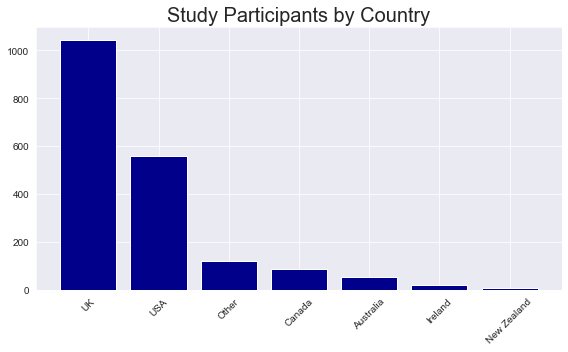

In [17]:
# Country participant totals and plot
country_group_dict = original_df.Country.value_counts().to_dict()

fig = plt.figure(figsize = (8,5))
plt.bar(range(len(country_group_dict)), list(country_group_dict.values()), align='center', color = 'darkblue')
plt.xticks(range(len(country_group_dict)), list(country_group_dict.keys()), rotation = 45)
plt.title('Study Participants by Country', fontsize = 20)
plt.tight_layout()
plt.savefig('Data_Visualizations/country.png')
plt.show()

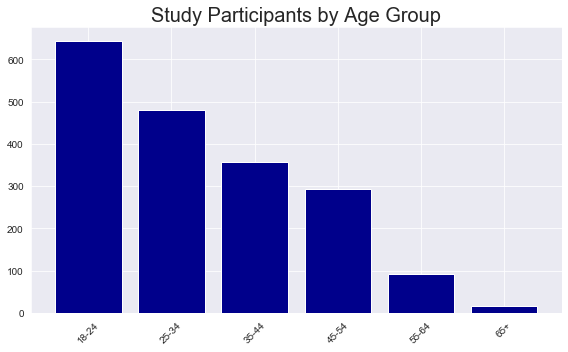

In [18]:
# Age group participant totals and plot
age_group_dict = original_df.Age.value_counts().to_dict()

fig = plt.figure(figsize = (8,5))
plt.bar(range(len(age_group_dict)), list(age_group_dict.values()), align='center', color = 'darkblue')
plt.xticks(range(len(age_group_dict)), list(age_group_dict.keys()), rotation = 45)
plt.title('Study Participants by Age Group', fontsize = 20)
plt.tight_layout()
plt.savefig('Data_Visualizations/age.png')
plt.show()

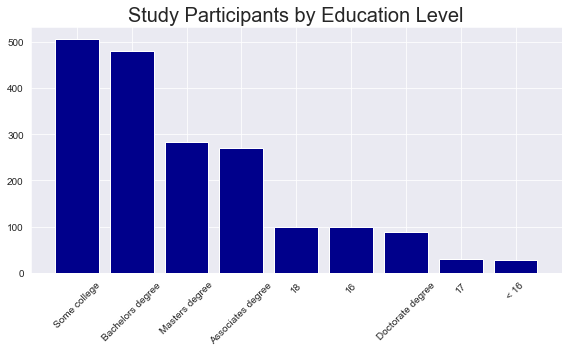

In [19]:
# Education Level participant totals and plot
education_group_dict = original_df.Education_level.value_counts().to_dict()

fig = plt.figure(figsize = (8,5))
plt.bar(range(len(education_group_dict)), list(education_group_dict.values()), align='center', color = 'darkblue')
plt.xticks(range(len(education_group_dict)), list(education_group_dict.keys()), rotation = 45)
plt.title('Study Participants by Education Level', fontsize = 20)
plt.tight_layout()
plt.savefig('Data_Visualizations/education.png')
plt.show()

In [20]:
# Import modeling libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
import itertools
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV

/Users/bengeissel/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Fitting the Models
With the use of many helper functions, grid search functions, and modeling functions for each type of classifier, the following function can be used to run all of the models for a given drug use dataframe.

In [22]:
# Function to combine all steps and run all the models
def modeling_steps(df):
    # Function to split dataframe into features and target
    X, y = helper_functions.get_x_y(df)
    
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)
    
    # Function to apply standard scaling post train_test_split
    X_train, X_test = helper_functions.scaling(X_train, X_test)
    
    # Function to grid search for best C and penalty
    C, P = grid_search_functions.grid_search_CP(X_train, y_train)
    k = grid_search_functions.grid_search_neighbors(X_train, y_train)
    n = grid_search_functions.grid_search_estimators(X_train, y_train)
    
    # Function to fit Logistic Regression Model and predict on test set
    logreg_df = modeling_functions.run_logreg(X_train, X_test, y_train, y_test, C, P)
    gaussian_df = modeling_functions.run_NB_Gaussian(X_train, X_test, y_train, y_test)
    knn_df = modeling_functions.run_knn(X_train, X_test, y_train, y_test, k)
    decision_tree_df = modeling_functions.run_decision_tree(X_train, X_test, y_train, y_test)
    random_forest_df = modeling_functions.run_random_forest(X_train, X_test, y_train, y_test, n)
    svc_df = modeling_functions.run_svc(X_train, X_test, y_train, y_test)
    linear_svc_df = modeling_functions.run_linear_svc(X_train, X_test, y_train, y_test)
    sgd_df = modeling_functions.run_sgd(X_train, X_test, y_train, y_test)
    
    
    model_dfs = [logreg_df, gaussian_df, knn_df, decision_tree_df,
                 random_forest_df, svc_df, linear_svc_df, sgd_df]
    
    # Combine dataframes
    final_df = pd.concat(model_dfs, join='outer')
    
    return final_df

 Alcohol 
Drug user percent: 96.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.9791044776119403
Recall: 0.7272727272727273
Accuracy: 0.7245762711864406
F1_Score: 0.8346055979643766


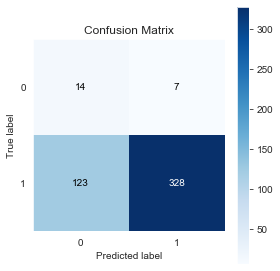


AUC: 0.7617991764333228


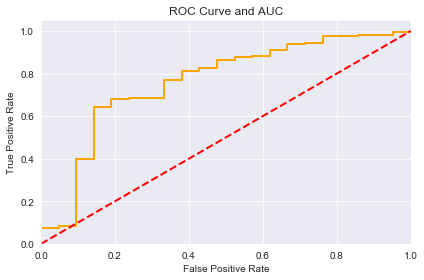

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.9714285714285714
Recall: 0.07538802660753881
Accuracy: 0.11440677966101695
F1_Score: 0.13991769547325106


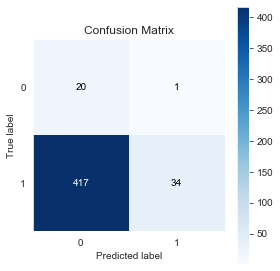


AUC: 0.6801816070108753


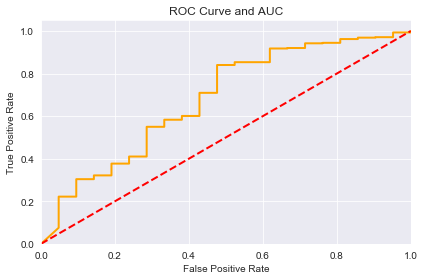

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.9621749408983451
Recall: 0.9024390243902439
Accuracy: 0.8728813559322034
F1_Score: 0.931350114416476


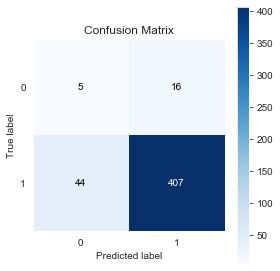


AUC: 0.570267131242741


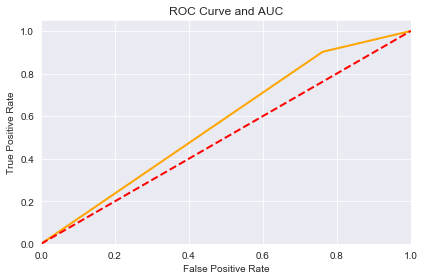

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.9533333333333334
Recall: 0.9512195121951219
Accuracy: 0.9088983050847458
F1_Score: 0.9522752497225305


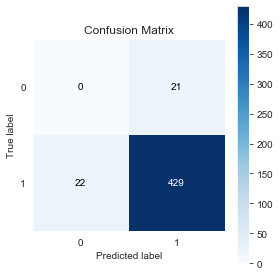


AUC: 0.47560975609756095


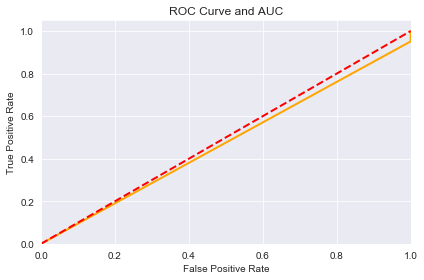

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.9574468085106383
Recall: 0.9977827050997783
Accuracy: 0.9555084745762712
F1_Score: 0.977198697068404


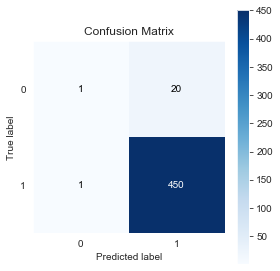


AUC: 0.6969169042339773


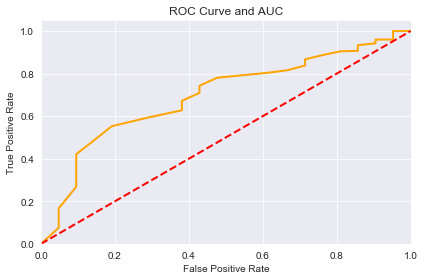

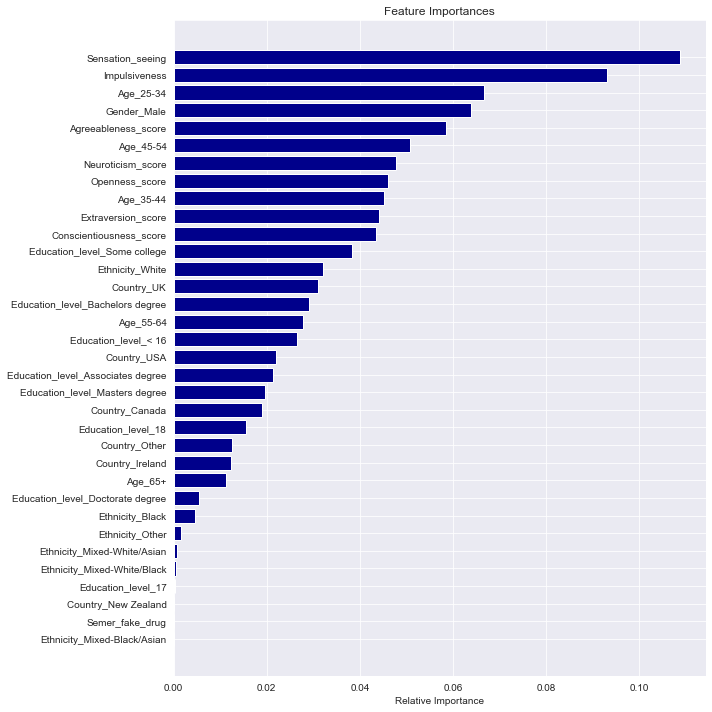

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.9655172413793104
Recall: 0.8070953436807096
Accuracy: 0.788135593220339
F1_Score: 0.8792270531400965


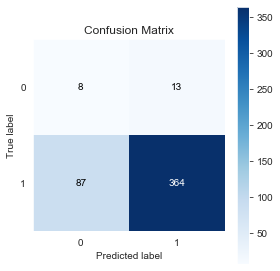


AUC: 0.620631401119206


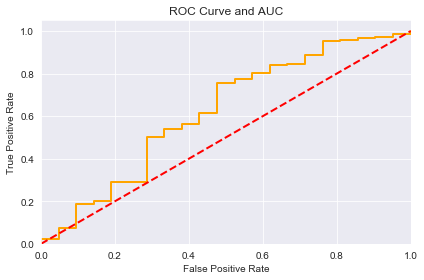

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.9814814814814815
Recall: 0.70509977827051
Accuracy: 0.7055084745762712
F1_Score: 0.8206451612903227


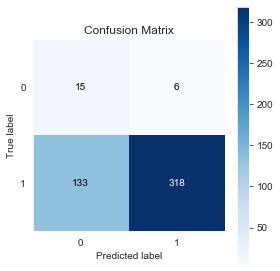

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.9892086330935251
Recall: 0.6097560975609756
Accuracy: 0.6207627118644068
F1_Score: 0.7544581618655692


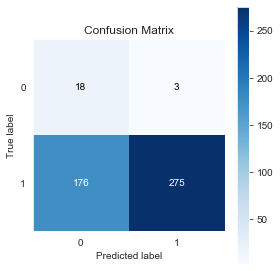


AUC: 0.7584204413472707


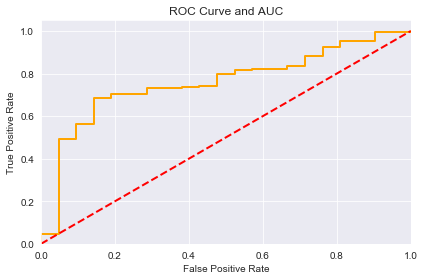

---------------------------------------------------------------------------
 Amphet 
Drug user percent: 35.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.5756097560975609
Recall: 0.7151515151515152
Accuracy: 0.7161016949152542
F1_Score: 0.6378378378378378


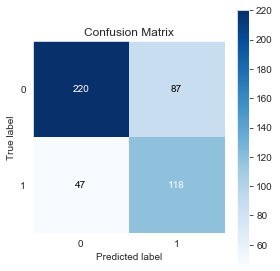


AUC: 0.7865758562826968


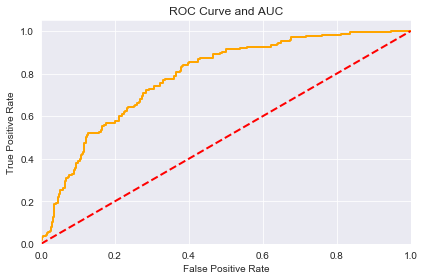

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.3968668407310705
Recall: 0.9212121212121213
Accuracy: 0.4830508474576271
F1_Score: 0.5547445255474454


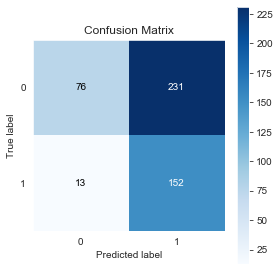


AUC: 0.7250913039186655


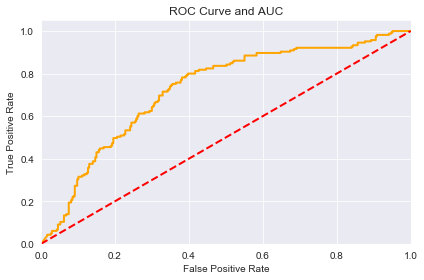

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.4793814432989691
Recall: 0.5636363636363636
Accuracy: 0.6334745762711864
F1_Score: 0.5181058495821728


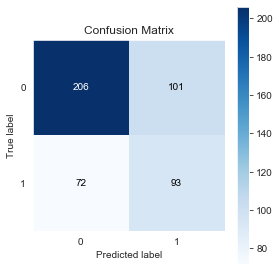


AUC: 0.6173230678116671


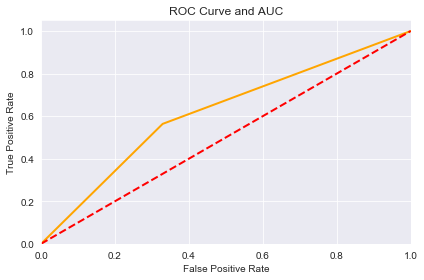

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.5136612021857924
Recall: 0.5696969696969697
Accuracy: 0.6610169491525424
F1_Score: 0.5402298850574713


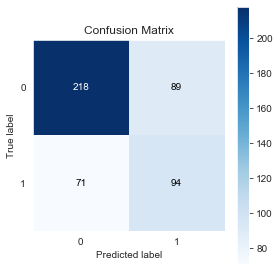


AUC: 0.6398973447833383


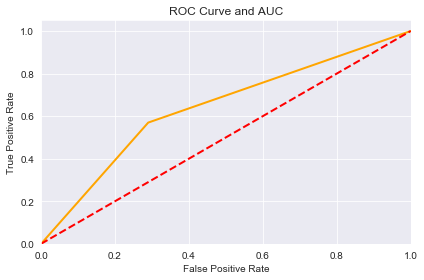

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.6081871345029239
Recall: 0.6303030303030303
Accuracy: 0.7288135593220338
F1_Score: 0.619047619047619


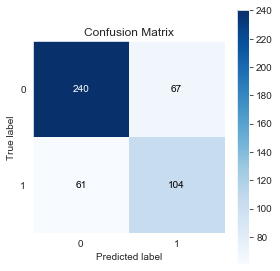


AUC: 0.7761425328200573


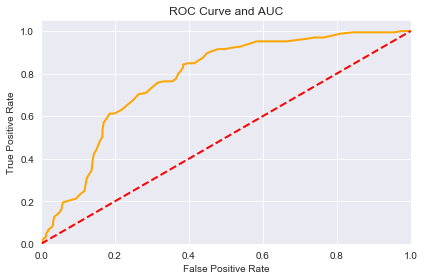

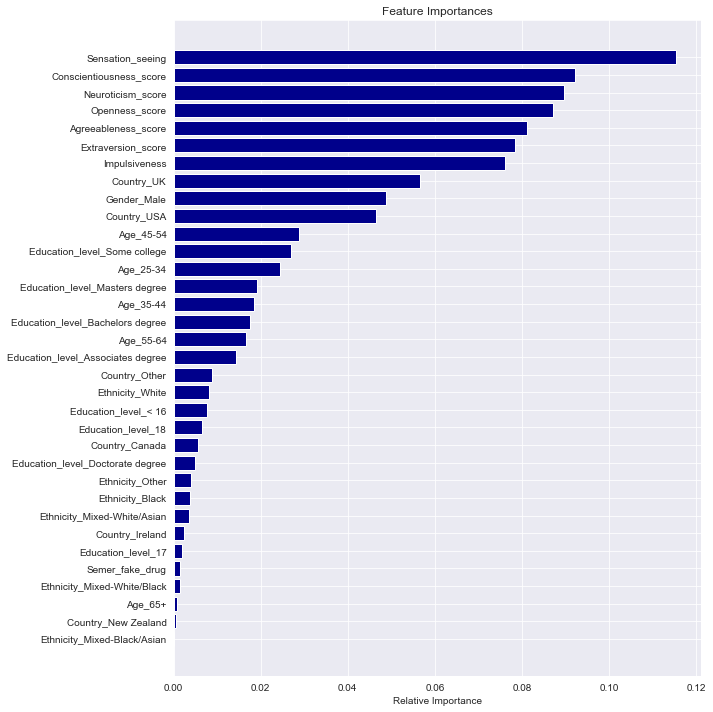

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.5594713656387665
Recall: 0.7696969696969697
Accuracy: 0.7076271186440678
F1_Score: 0.6479591836734694


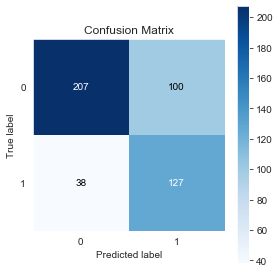


AUC: 0.7780080939690059


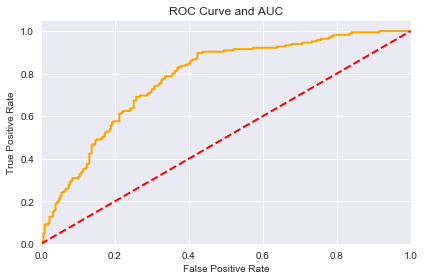

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.5700483091787439
Recall: 0.7151515151515152
Accuracy: 0.711864406779661
F1_Score: 0.6344086021505376


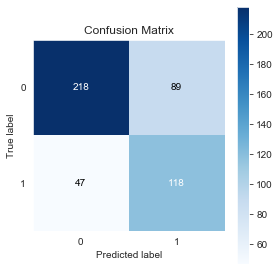

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.5707317073170731
Recall: 0.7090909090909091
Accuracy: 0.711864406779661
F1_Score: 0.6324324324324324


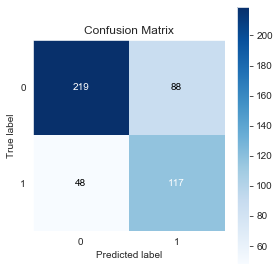


AUC: 0.775382489389004


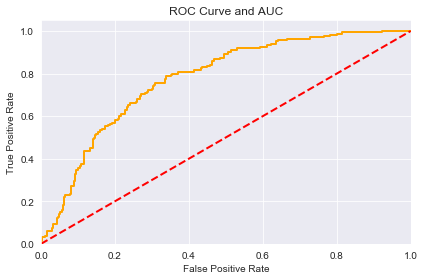

---------------------------------------------------------------------------
 Amyl 
Drug user percent: 19.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.3546511627906977
Recall: 0.6853932584269663
Accuracy: 0.7055084745762712
F1_Score: 0.4674329501915709


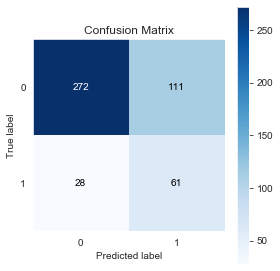


AUC: 0.7247631061695075


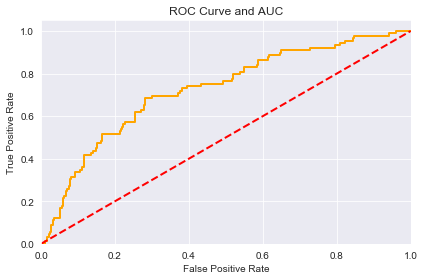

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.1995249406175772
Recall: 0.9438202247191011
Accuracy: 0.2754237288135593
F1_Score: 0.32941176470588235


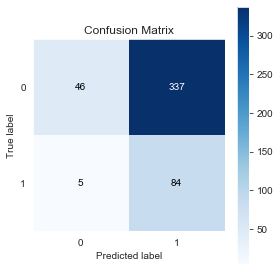


AUC: 0.6968639070613429


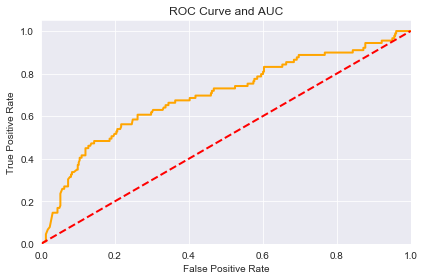

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.23225806451612904
Recall: 0.4044943820224719
Accuracy: 0.635593220338983
F1_Score: 0.29508196721311475


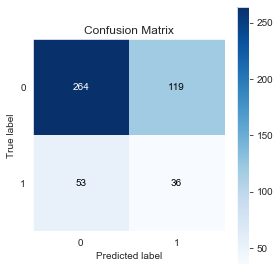


AUC: 0.5468947105934814


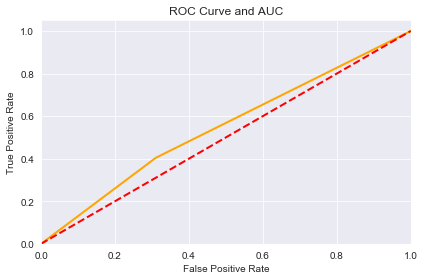

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.22727272727272727
Recall: 0.2808988764044944
Accuracy: 0.684322033898305
F1_Score: 0.2512562814070352


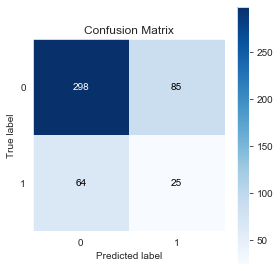


AUC: 0.529483380760994


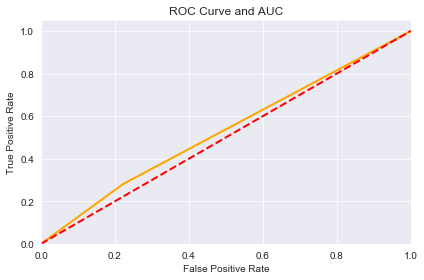

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.425531914893617
Recall: 0.2247191011235955
Accuracy: 0.7966101694915254
F1_Score: 0.2941176470588235


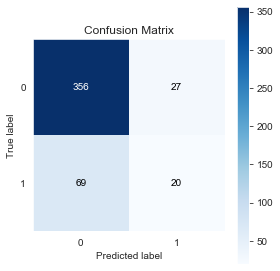


AUC: 0.6891483556781178


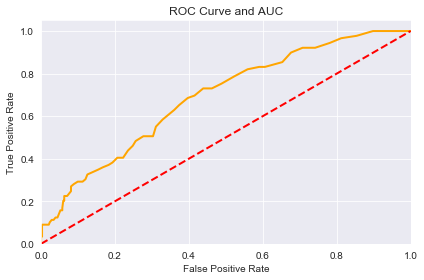

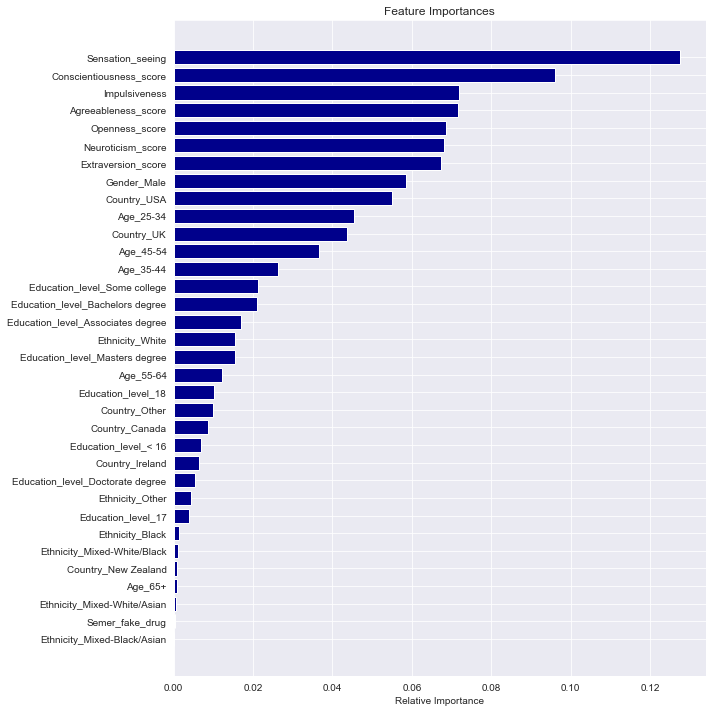

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.32919254658385094
Recall: 0.5955056179775281
Accuracy: 0.6949152542372882
F1_Score: 0.42400000000000004


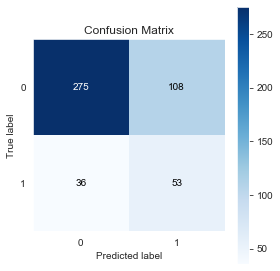


AUC: 0.7006190043124945


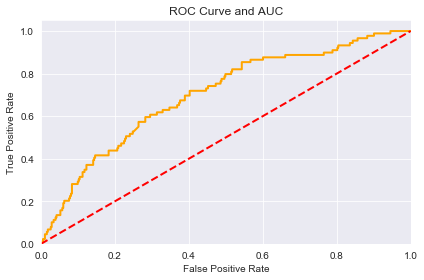

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.32748538011695905
Recall: 0.6292134831460674
Accuracy: 0.6864406779661016
F1_Score: 0.43076923076923074


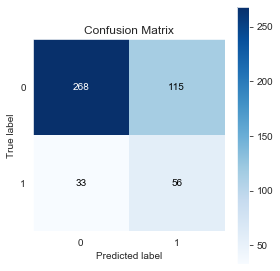

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.36607142857142855
Recall: 0.4606741573033708
Accuracy: 0.7478813559322034
F1_Score: 0.4079601990049751


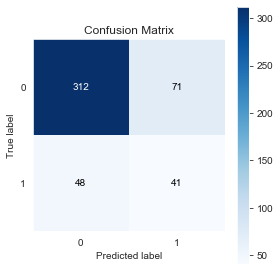


AUC: 0.7014110951389092


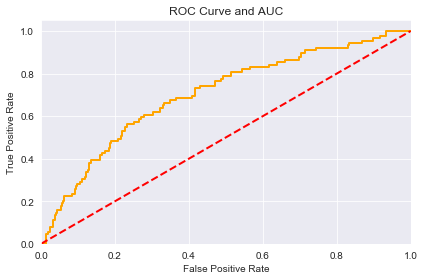

---------------------------------------------------------------------------
 Benzos 
Drug user percent: 42.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.5972222222222222
Recall: 0.6548223350253807
Accuracy: 0.6716101694915254
F1_Score: 0.6246973365617433


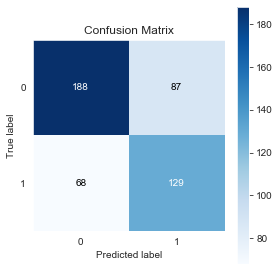


AUC: 0.707152745731426


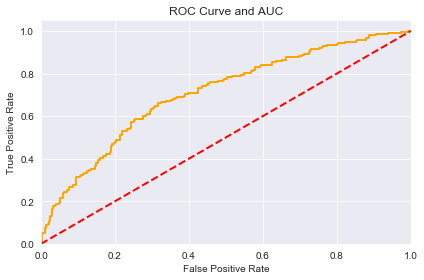

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.5416666666666666
Recall: 0.5279187817258884
Accuracy: 0.6165254237288136
F1_Score: 0.5347043701799485


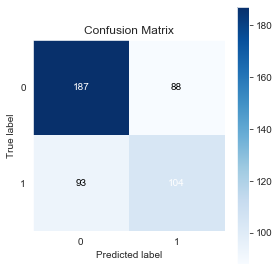


AUC: 0.6443747115828334


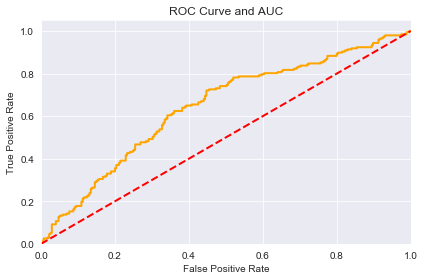

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.5288461538461539
Recall: 0.5583756345177665
Accuracy: 0.6080508474576272
F1_Score: 0.5432098765432098


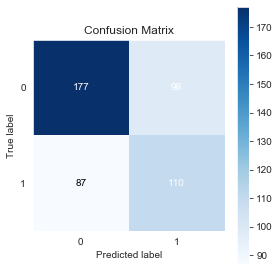


AUC: 0.6010059990770651


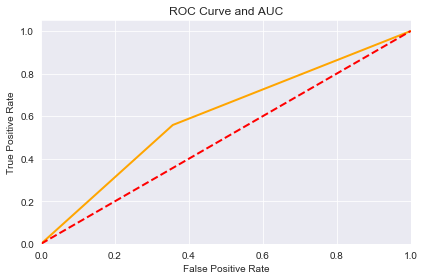

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.5355191256830601
Recall: 0.49746192893401014
Accuracy: 0.6101694915254238
F1_Score: 0.5157894736842105


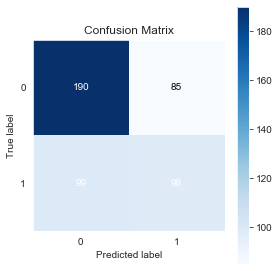


AUC: 0.5941855099215505


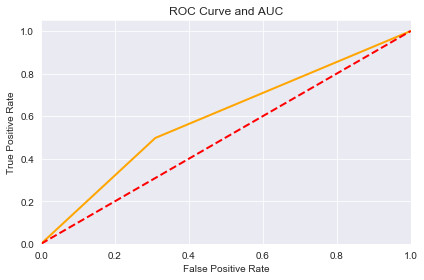

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.5677083333333334
Recall: 0.5532994923857868
Accuracy: 0.6377118644067796
F1_Score: 0.5604113110539846


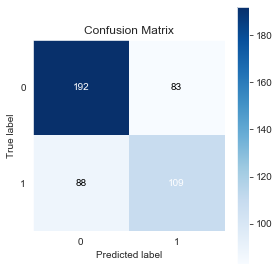


AUC: 0.7011444393170282


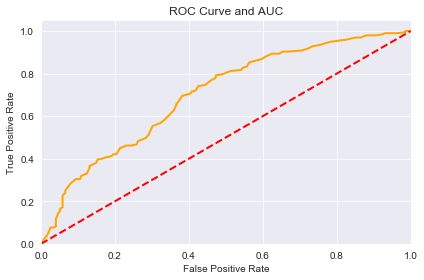

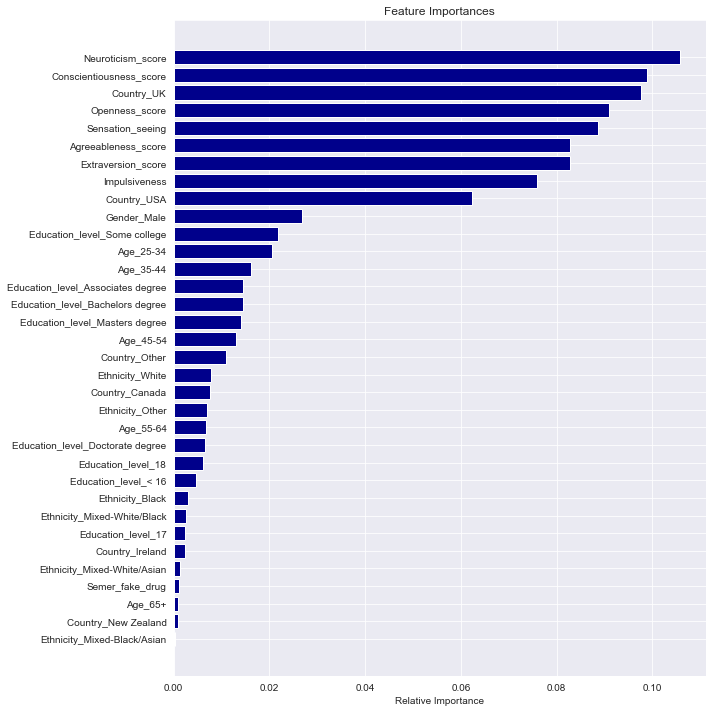

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.5627906976744186
Recall: 0.6142131979695431
Accuracy: 0.6398305084745762
F1_Score: 0.587378640776699


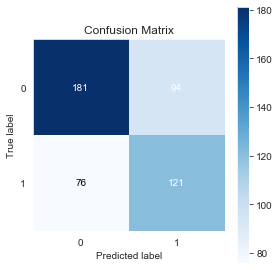


AUC: 0.7039501615136133


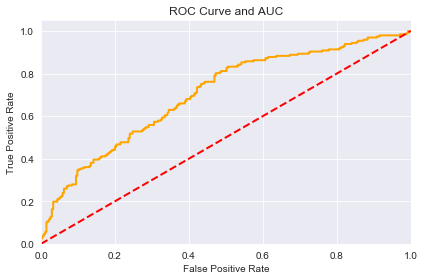

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.5789473684210527
Recall: 0.6142131979695431
Accuracy: 0.652542372881356
F1_Score: 0.5960591133004925


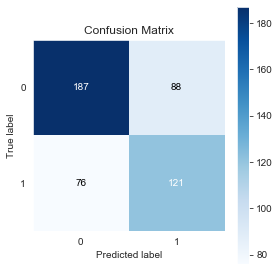

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.6078431372549019
Recall: 0.4720812182741117
Accuracy: 0.652542372881356
F1_Score: 0.5314285714285714


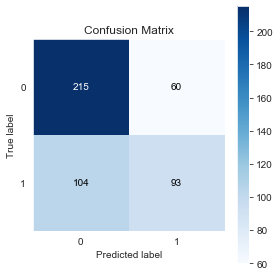


AUC: 0.670179972311952


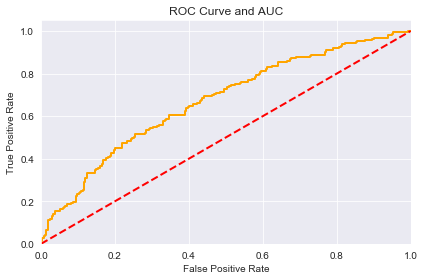

---------------------------------------------------------------------------
 Caffeine 
Drug user percent: 98.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.9881305637982196
Recall: 0.7223427331887202
Accuracy: 0.7203389830508474
F1_Score: 0.8345864661654135


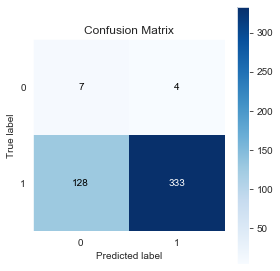


AUC: 0.6945375665549202


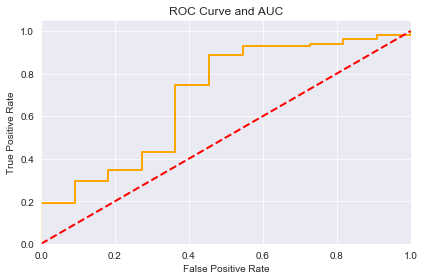

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.9876543209876543
Recall: 0.1735357917570499
Accuracy: 0.1906779661016949
F1_Score: 0.2952029520295203


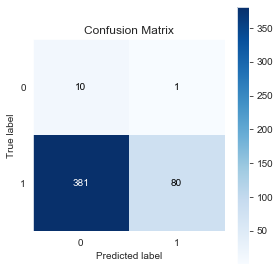


AUC: 0.6710707947150463


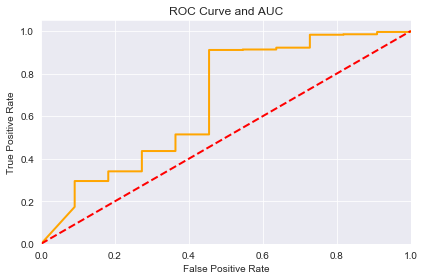

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.9745958429561201
Recall: 0.9154013015184381
Accuracy: 0.8940677966101694
F1_Score: 0.9440715883668903


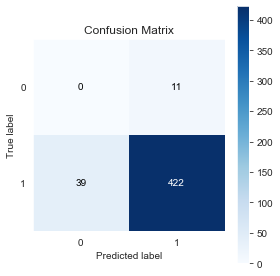


AUC: 0.45770065075921906


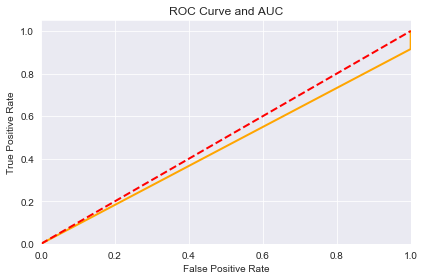

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.977924944812362
Recall: 0.9609544468546638
Accuracy: 0.940677966101695
F1_Score: 0.9693654266958425


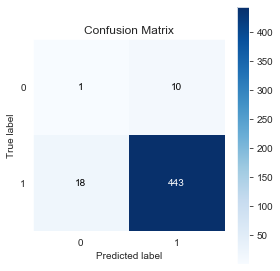


AUC: 0.5259317688818773


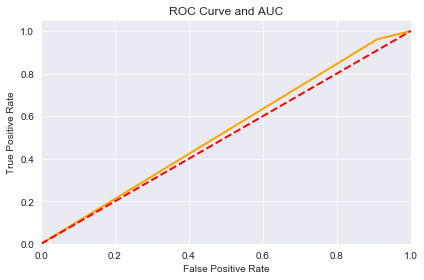

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.9766454352441614
Recall: 0.9978308026030369
Accuracy: 0.9745762711864406
F1_Score: 0.9871244635193134


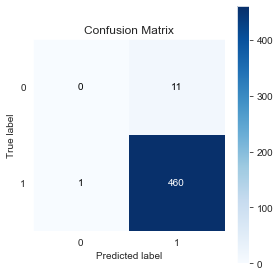


AUC: 0.6932557680930783


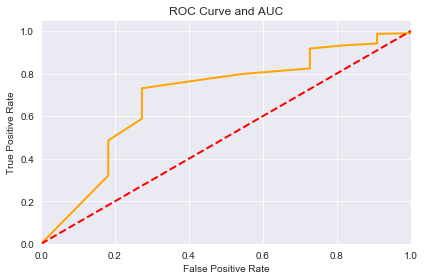

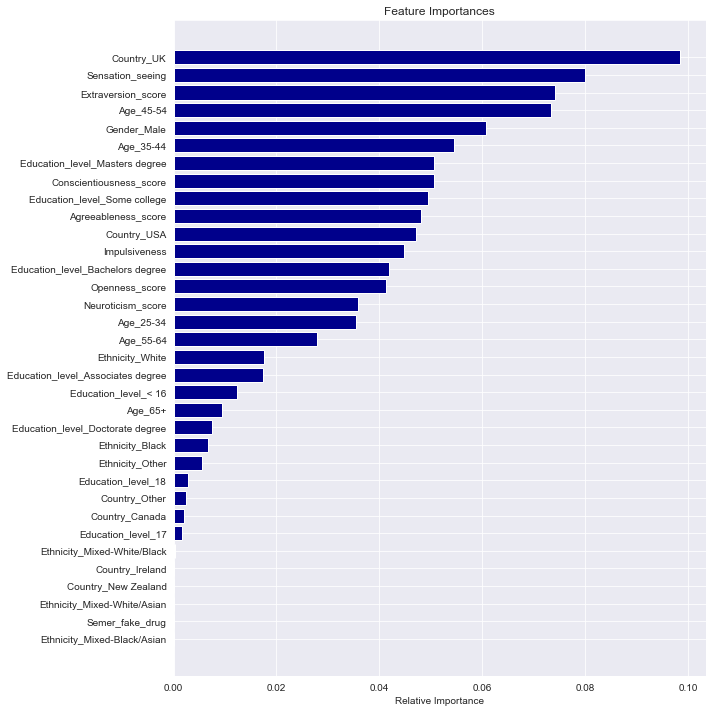

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.9845360824742269
Recall: 0.8286334056399133
Accuracy: 0.8199152542372882
F1_Score: 0.899882214369847


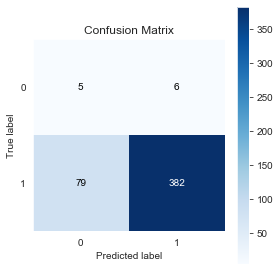


AUC: 0.6983829619404457


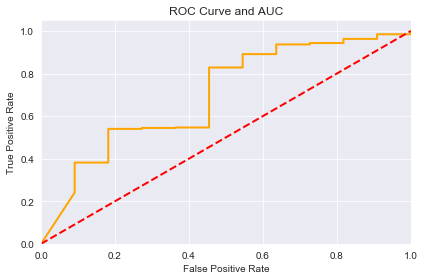

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.9876543209876543
Recall: 0.6941431670281996
Accuracy: 0.6927966101694916
F1_Score: 0.8152866242038216


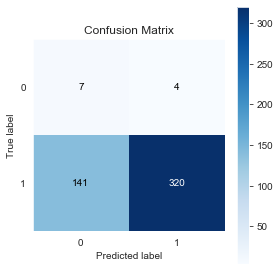

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.9874213836477987
Recall: 0.6811279826464208
Accuracy: 0.6800847457627118
F1_Score: 0.8061617458279846


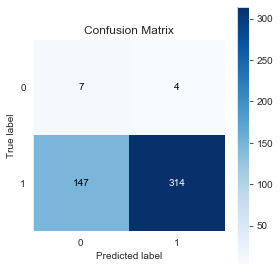


AUC: 0.6807335831197002


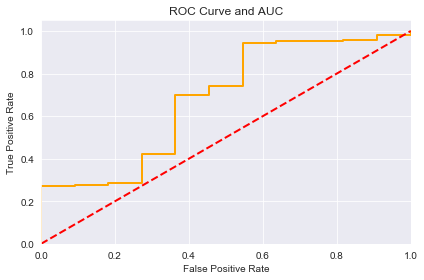

---------------------------------------------------------------------------
 Cannabis 
Drug user percent: 69.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.9007352941176471
Recall: 0.7469512195121951
Accuracy: 0.7669491525423728
F1_Score: 0.8166666666666668


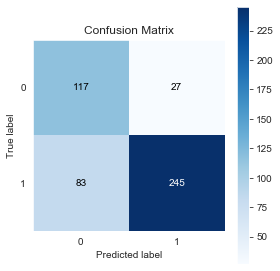


AUC: 0.8858189363143631


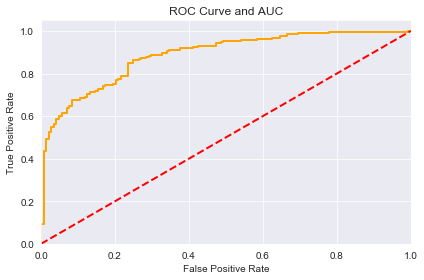

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.9144385026737968
Recall: 0.5213414634146342
Accuracy: 0.6334745762711864
F1_Score: 0.6640776699029126


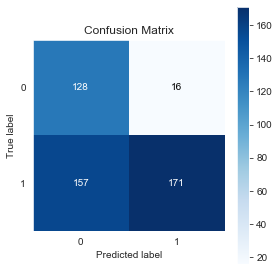


AUC: 0.8058202066395663


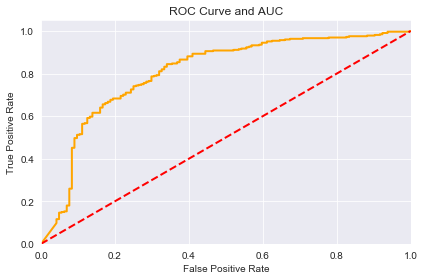

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.8403908794788274
Recall: 0.7865853658536586
Accuracy: 0.7478813559322034
F1_Score: 0.8125984251968504


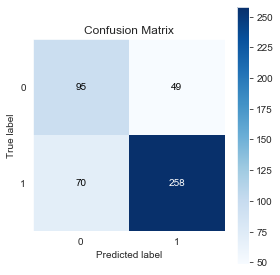


AUC: 0.7231537940379404


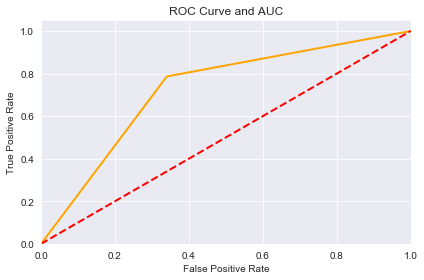

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.8381877022653722
Recall: 0.7896341463414634
Accuracy: 0.7478813559322034
F1_Score: 0.8131868131868132


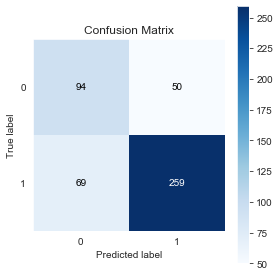


AUC: 0.7212059620596205


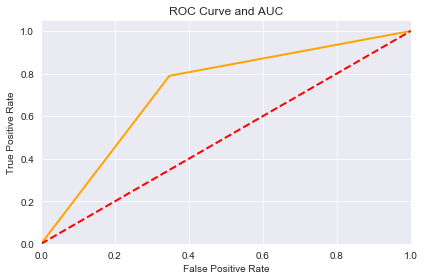

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.8670886075949367
Recall: 0.8353658536585366
Accuracy: 0.7966101694915254
F1_Score: 0.8509316770186336


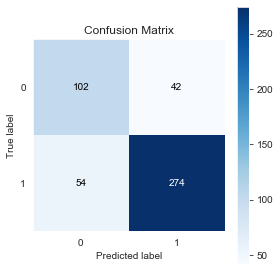


AUC: 0.8741848746612466


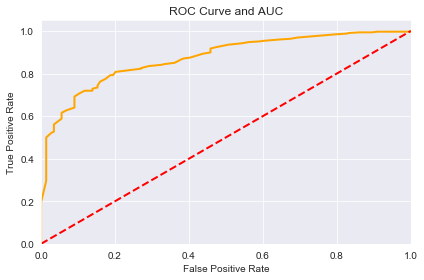

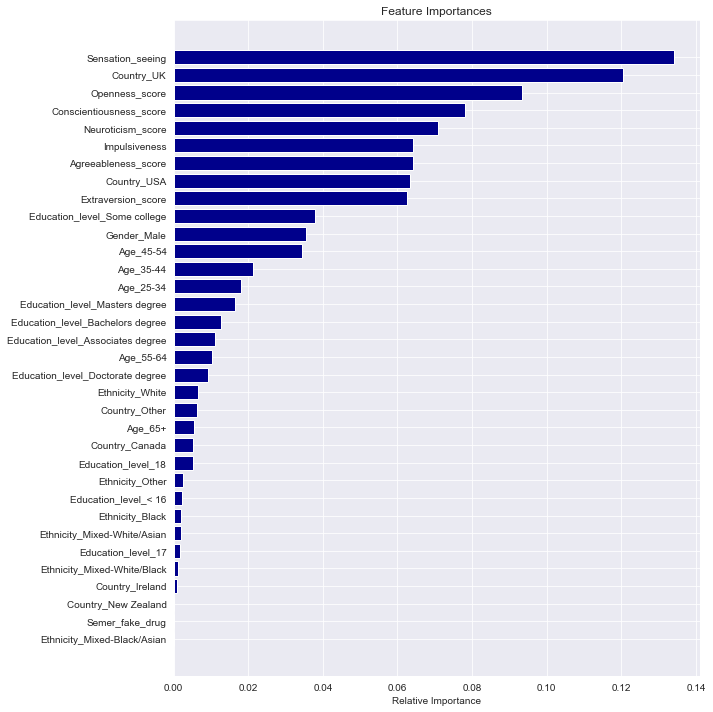

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.9153846153846154
Recall: 0.725609756097561
Accuracy: 0.7627118644067796
F1_Score: 0.8095238095238095


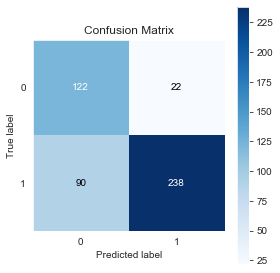


AUC: 0.8796366869918699


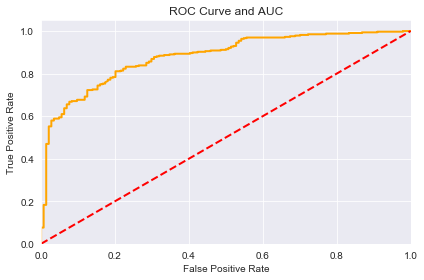

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.9157509157509157
Recall: 0.7621951219512195
Accuracy: 0.7860169491525424
F1_Score: 0.831946755407654


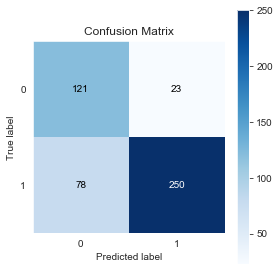

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.8888888888888888
Recall: 0.8048780487804879
Accuracy: 0.7944915254237288
F1_Score: 0.8448


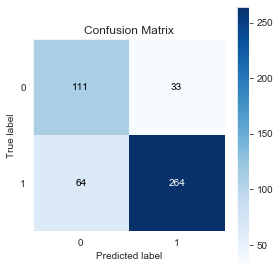


AUC: 0.8740896002710027


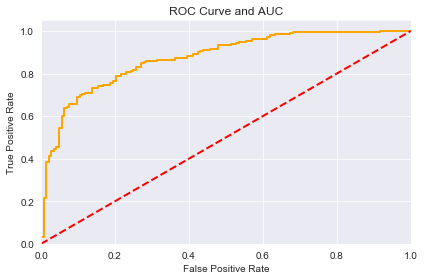

---------------------------------------------------------------------------
 Chocolate 
Drug user percent: 99.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.9917127071823204
Recall: 0.7720430107526882
Accuracy: 0.7690677966101694
F1_Score: 0.8681983071342202


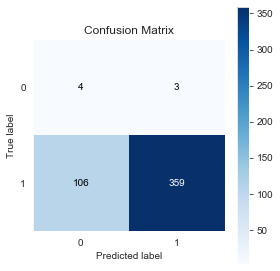


AUC: 0.7259600614439323


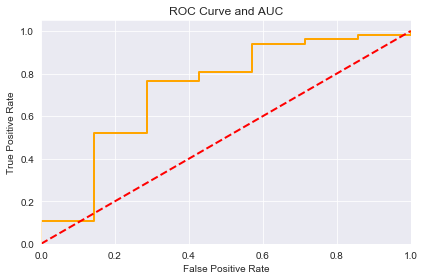

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 1.0
Recall: 0.06236559139784946
Accuracy: 0.07627118644067797
F1_Score: 0.1174089068825911


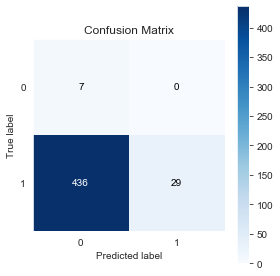


AUC: 0.6396313364055299


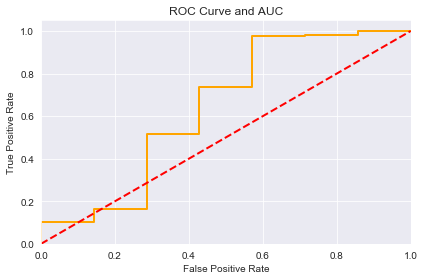

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.9886363636363636
Recall: 0.9354838709677419
Accuracy: 0.9258474576271186
F1_Score: 0.9613259668508287


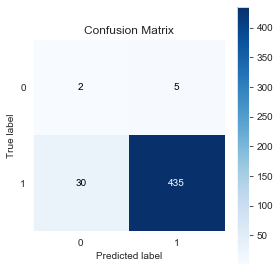


AUC: 0.6105990783410138


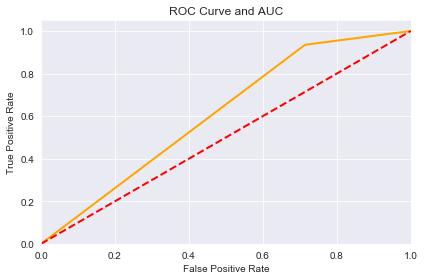

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.9845814977973568
Recall: 0.9612903225806452
Accuracy: 0.9470338983050848
F1_Score: 0.9727965179542982


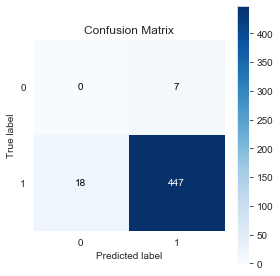


AUC: 0.4806451612903226


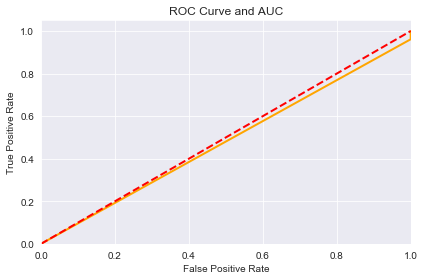

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.9851694915254238
Recall: 1.0
Accuracy: 0.9851694915254238
F1_Score: 0.9925293489861259


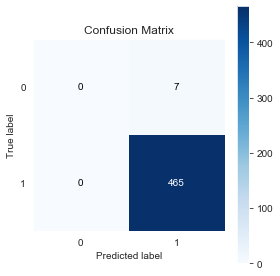


AUC: 0.7450076804915515


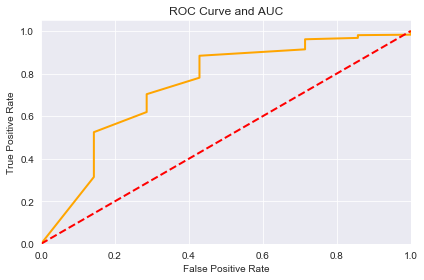

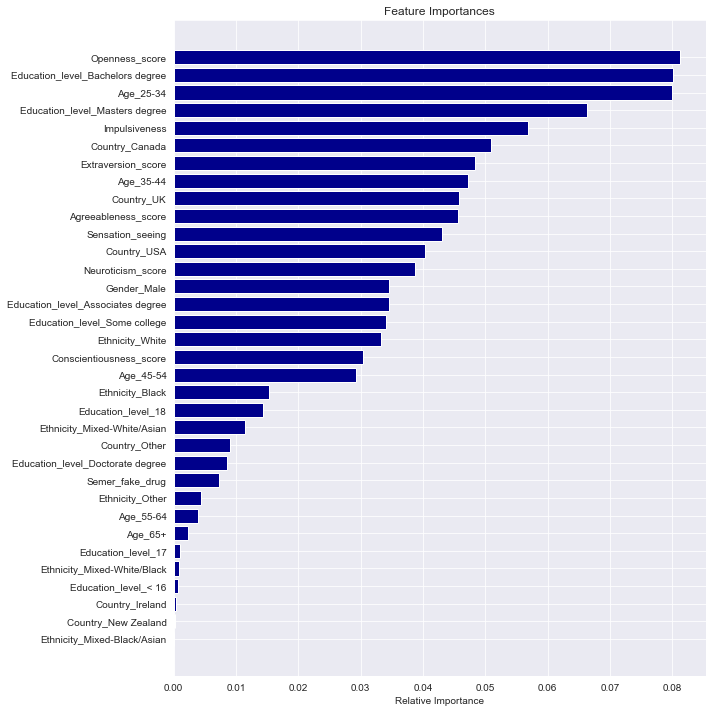

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.9901477832512315
Recall: 0.864516129032258
Accuracy: 0.8580508474576272
F1_Score: 0.923076923076923


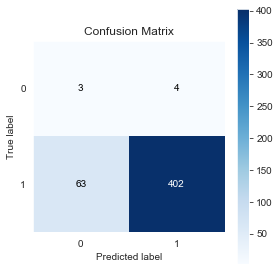


AUC: 0.6998463901689708


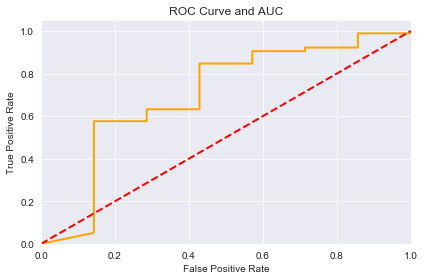

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.9915492957746479
Recall: 0.7569892473118279
Accuracy: 0.7542372881355932
F1_Score: 0.8585365853658536


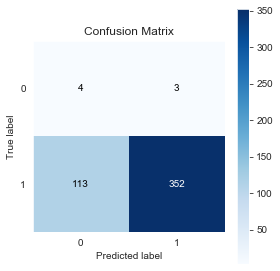

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.9915492957746479
Recall: 0.7569892473118279
Accuracy: 0.7542372881355932
F1_Score: 0.8585365853658536


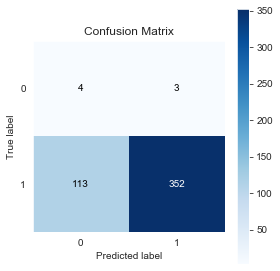


AUC: 0.7327188940092166


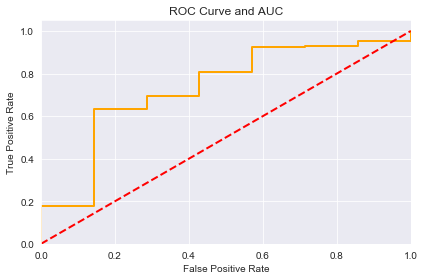

---------------------------------------------------------------------------
 Cocaine 
Drug user percent: 38.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.5676855895196506
Recall: 0.7222222222222222
Accuracy: 0.684322033898305
F1_Score: 0.6356968215158925


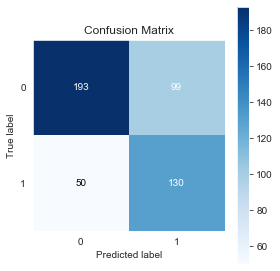


AUC: 0.7421042617960426


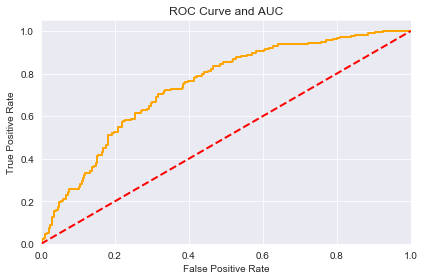

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.42857142857142855
Recall: 0.9166666666666666
Accuracy: 0.5021186440677966
F1_Score: 0.5840707964601769


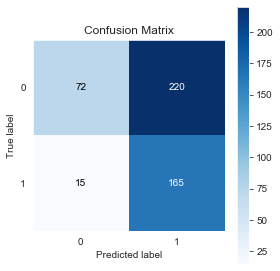


AUC: 0.7018074581430745


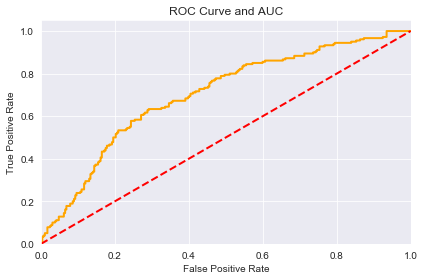

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.4845360824742268
Recall: 0.5222222222222223
Accuracy: 0.6059322033898306
F1_Score: 0.5026737967914439


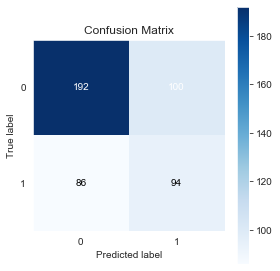


AUC: 0.5898782343987823


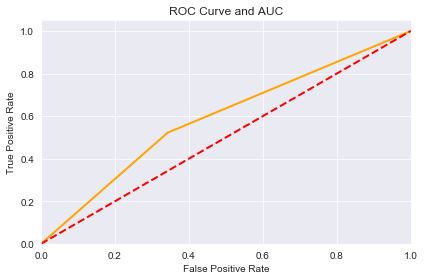

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.5028571428571429
Recall: 0.4888888888888889
Accuracy: 0.6207627118644068
F1_Score: 0.49577464788732395


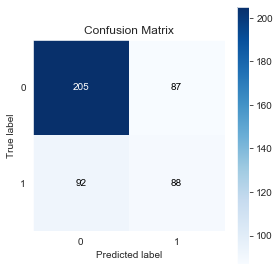


AUC: 0.5954718417047185


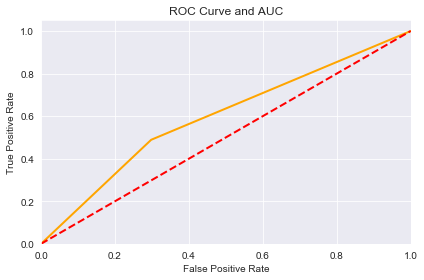

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.6127167630057804
Recall: 0.5888888888888889
Accuracy: 0.701271186440678
F1_Score: 0.6005665722379604


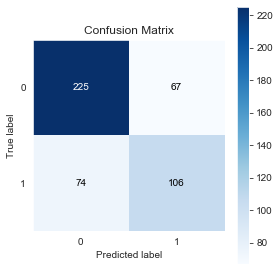


AUC: 0.7469558599695586


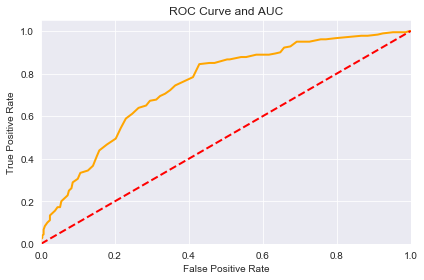

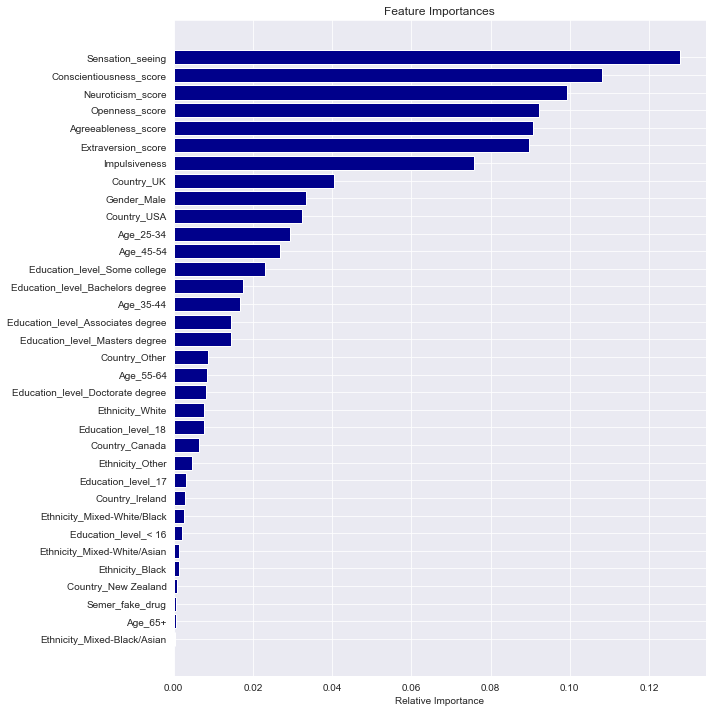

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.5546558704453441
Recall: 0.7611111111111111
Accuracy: 0.6758474576271186
F1_Score: 0.6416861826697892


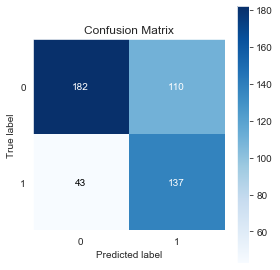


AUC: 0.7484018264840183


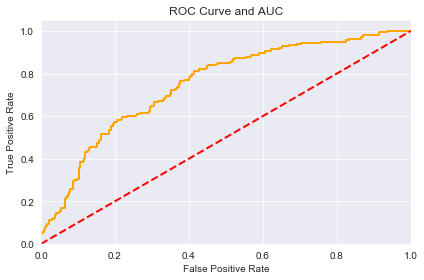

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.5650224215246636
Recall: 0.7
Accuracy: 0.6800847457627118
F1_Score: 0.6253101736972704


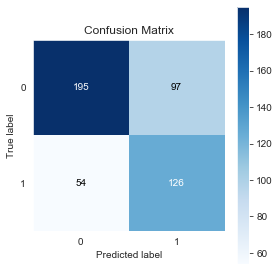

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.5333333333333333
Recall: 0.7555555555555555
Accuracy: 0.6546610169491526
F1_Score: 0.6252873563218392


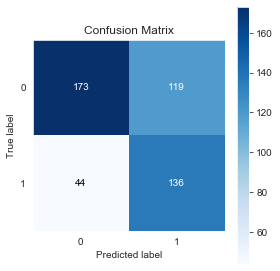


AUC: 0.7373287671232878


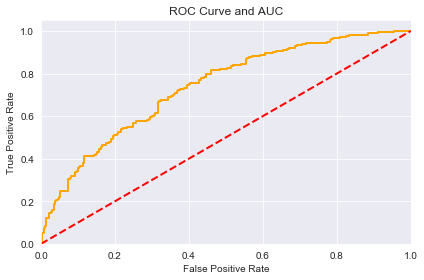

---------------------------------------------------------------------------
 Crack 
Drug user percent: 10.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.20915032679738563
Recall: 0.6666666666666666
Accuracy: 0.7097457627118644
F1_Score: 0.31840796019900497


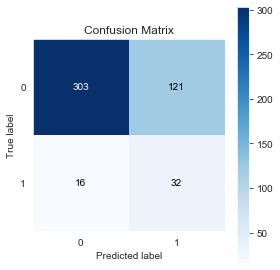


AUC: 0.7647897012578616


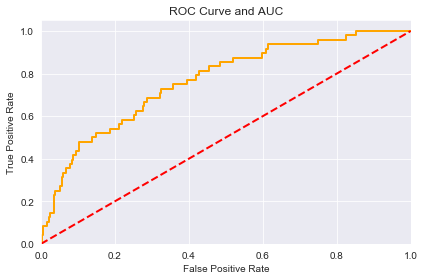

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.1048780487804878
Recall: 0.8958333333333334
Accuracy: 0.211864406779661
F1_Score: 0.18777292576419213


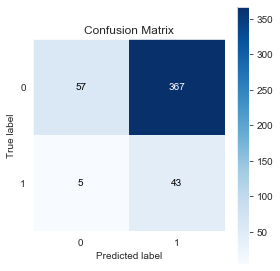


AUC: 0.6656102594339623


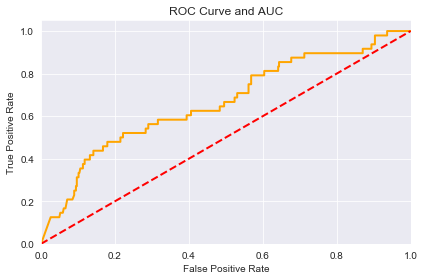

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.19318181818181818
Recall: 0.3541666666666667
Accuracy: 0.7838983050847458
F1_Score: 0.25


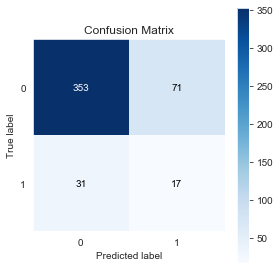


AUC: 0.5933569182389937


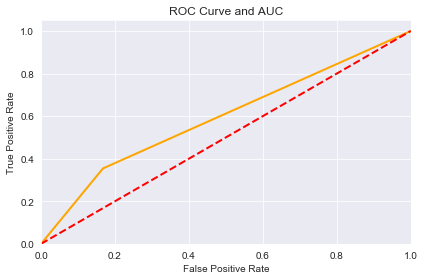

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.15789473684210525
Recall: 0.1875
Accuracy: 0.815677966101695
F1_Score: 0.17142857142857143


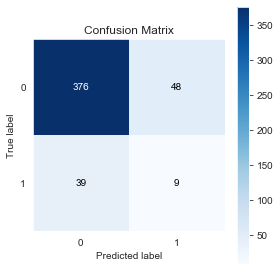


AUC: 0.5371462264150944


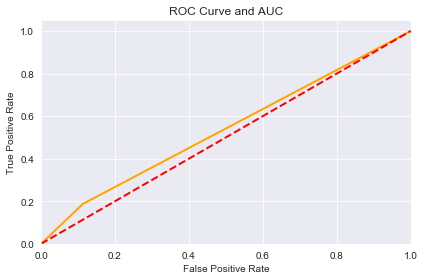

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.391304347826087
Recall: 0.1875
Accuracy: 0.8877118644067796
F1_Score: 0.25352112676056343


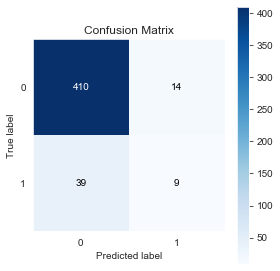


AUC: 0.7576896619496856


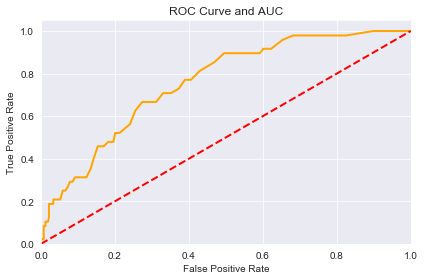

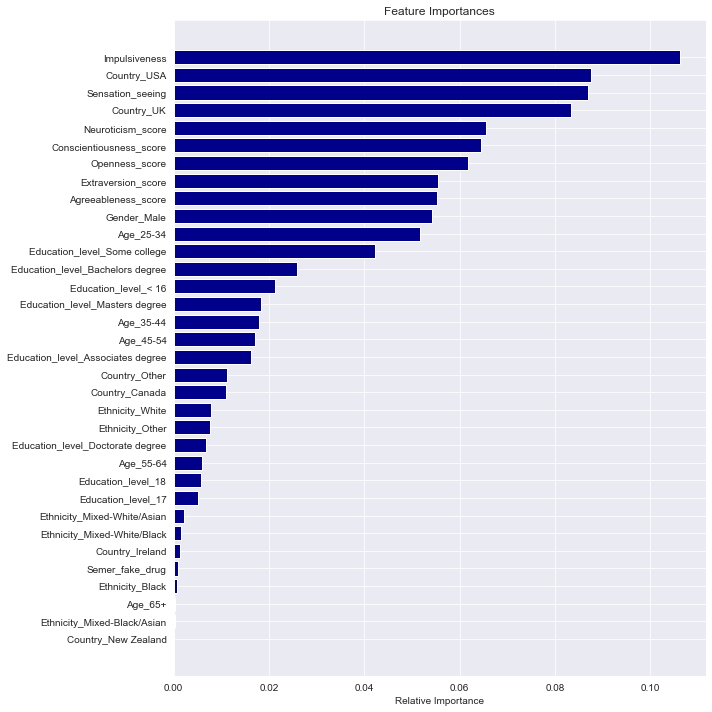

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.19463087248322147
Recall: 0.6041666666666666
Accuracy: 0.7055084745762712
F1_Score: 0.29441624365482233


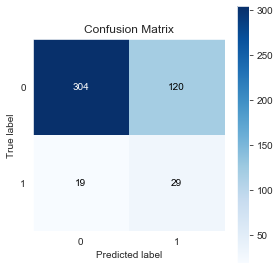


AUC: 0.7293632075471698


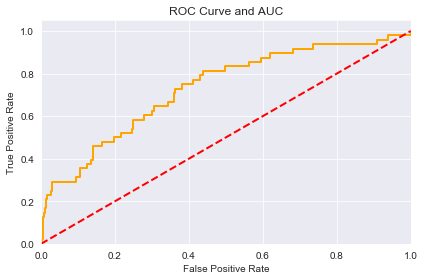

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.20125786163522014
Recall: 0.6666666666666666
Accuracy: 0.6970338983050848
F1_Score: 0.30917874396135264


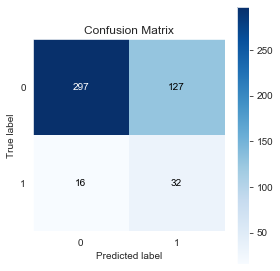

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.18562874251497005
Recall: 0.6458333333333334
Accuracy: 0.6758474576271186
F1_Score: 0.2883720930232558


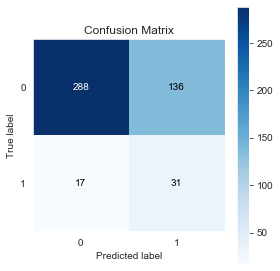


AUC: 0.7501965408805031


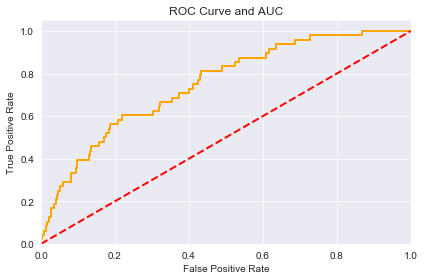

---------------------------------------------------------------------------
 Ecstacy 
Drug user percent: 40.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.6681818181818182
Recall: 0.786096256684492
Accuracy: 0.760593220338983
F1_Score: 0.7223587223587224


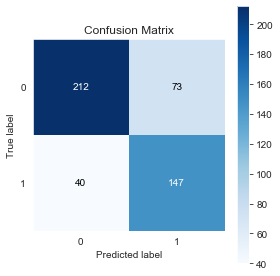


AUC: 0.8354629890233606


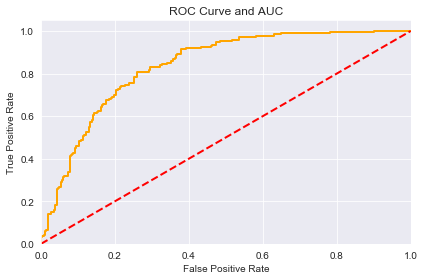

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.43364928909952605
Recall: 0.9786096256684492
Accuracy: 0.4851694915254237
F1_Score: 0.6009852216748769


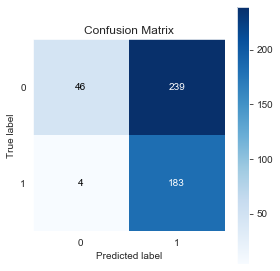


AUC: 0.7903555680645463


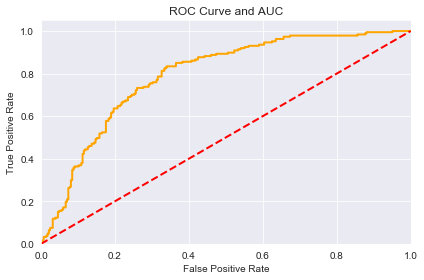

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.5352112676056338
Recall: 0.6096256684491979
Accuracy: 0.635593220338983
F1_Score: 0.57


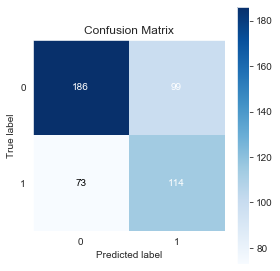


AUC: 0.6311286236982832


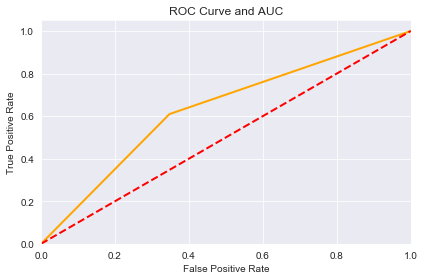

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.4909090909090909
Recall: 0.5775401069518716
Accuracy: 0.5953389830508474
F1_Score: 0.5307125307125308


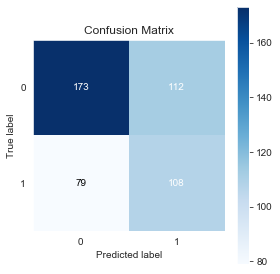


AUC: 0.5922788254057604


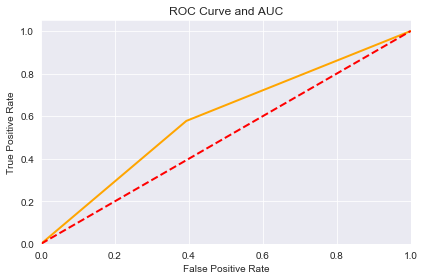

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.6737967914438503
Recall: 0.6737967914438503
Accuracy: 0.7415254237288136
F1_Score: 0.6737967914438503


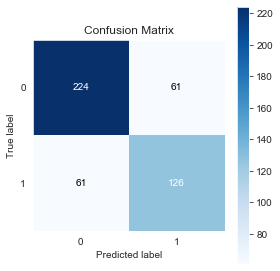


AUC: 0.8066422741345343


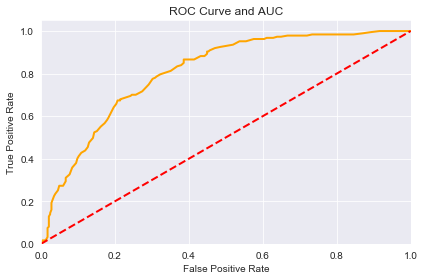

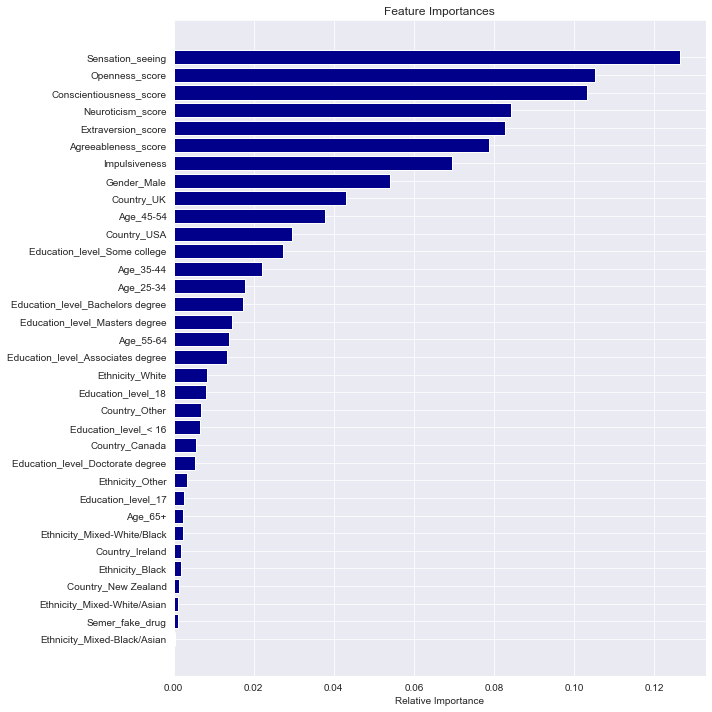

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.6340425531914894
Recall: 0.7967914438502673
Accuracy: 0.7372881355932204
F1_Score: 0.7061611374407583


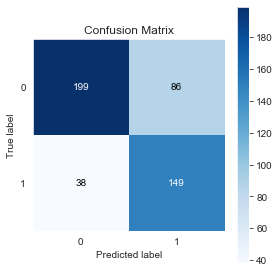


AUC: 0.8217281170841542


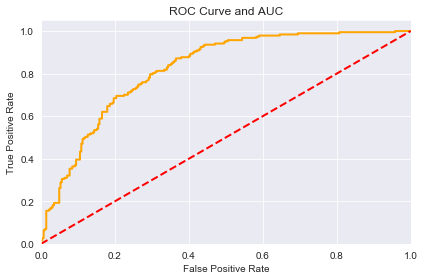

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.680365296803653
Recall: 0.7967914438502673
Accuracy: 0.7711864406779662
F1_Score: 0.7339901477832512


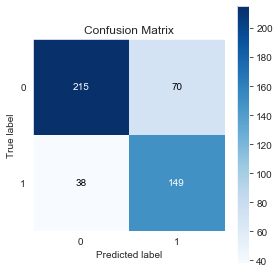

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.5524475524475524
Recall: 0.8449197860962567
Accuracy: 0.6673728813559322
F1_Score: 0.6680761099365751


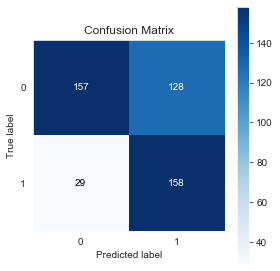


AUC: 0.7686462144666479


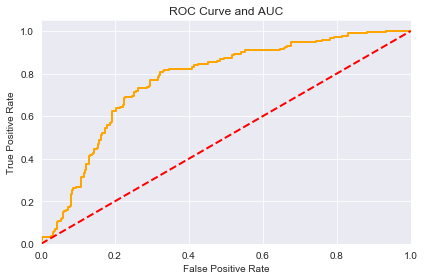

---------------------------------------------------------------------------
 Heroin 
Drug user percent: 11.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.2781456953642384
Recall: 0.7777777777777778
Accuracy: 0.7436440677966102
F1_Score: 0.4097560975609756


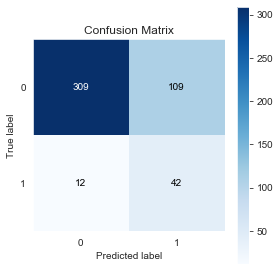


AUC: 0.8141059720007088


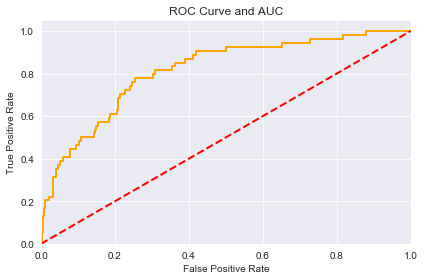

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.11221945137157108
Recall: 0.8333333333333334
Accuracy: 0.2266949152542373
F1_Score: 0.1978021978021978


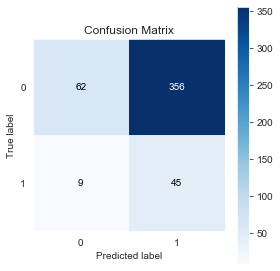


AUC: 0.7105263157894738


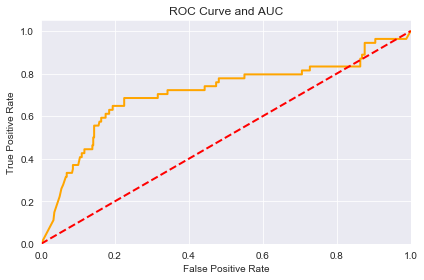

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.25
Recall: 0.5
Accuracy: 0.7711864406779662
F1_Score: 0.3333333333333333


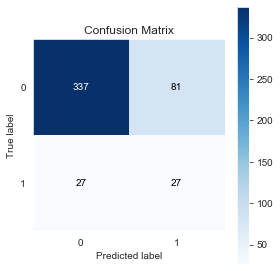


AUC: 0.6531100478468901


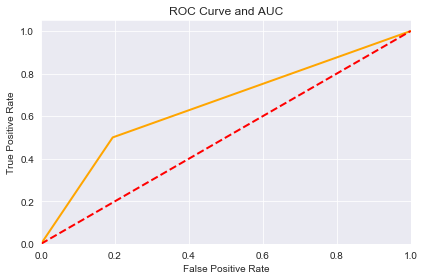

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.19767441860465115
Recall: 0.3148148148148148
Accuracy: 0.7754237288135594
F1_Score: 0.24285714285714288


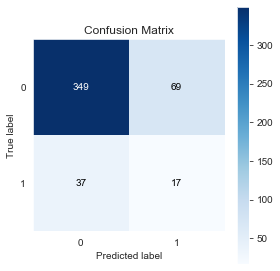


AUC: 0.5748715222399433


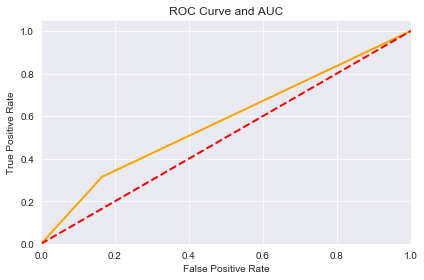

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.46875
Recall: 0.2777777777777778
Accuracy: 0.8813559322033898
F1_Score: 0.3488372093023256


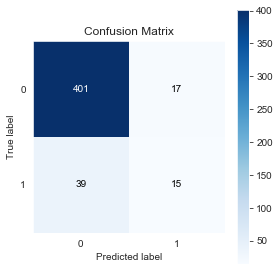


AUC: 0.8341307814992025


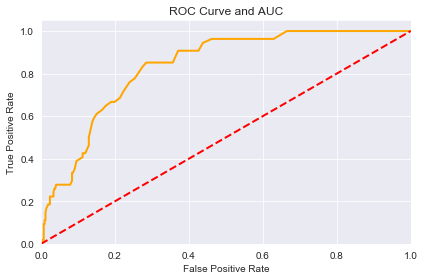

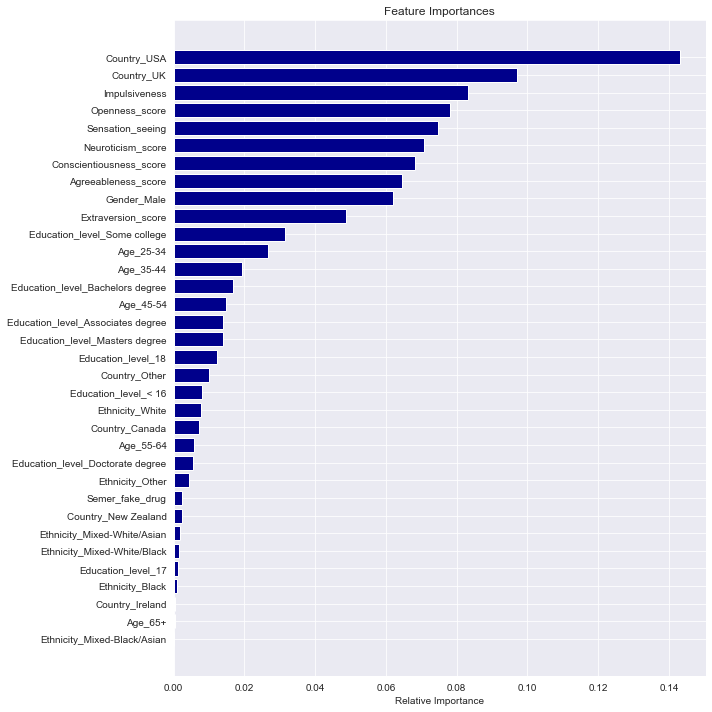

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.2679738562091503
Recall: 0.7592592592592593
Accuracy: 0.7351694915254238
F1_Score: 0.3961352657004831


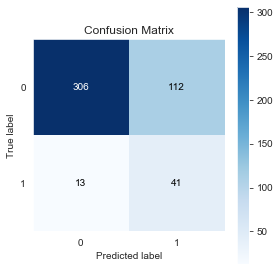


AUC: 0.8127325890483784


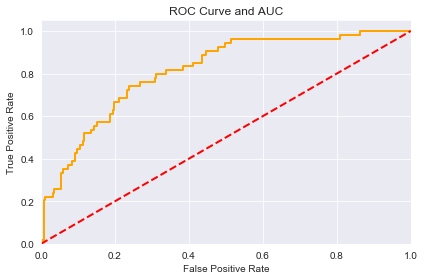

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.26380368098159507
Recall: 0.7962962962962963
Accuracy: 0.722457627118644
F1_Score: 0.3963133640552995


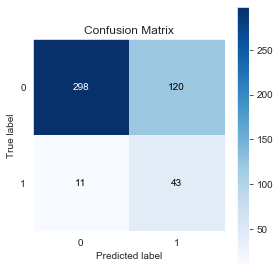

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.28289473684210525
Recall: 0.7962962962962963
Accuracy: 0.7457627118644068
F1_Score: 0.4174757281553398


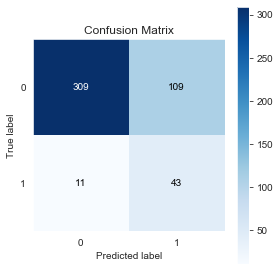


AUC: 0.8094098883572568


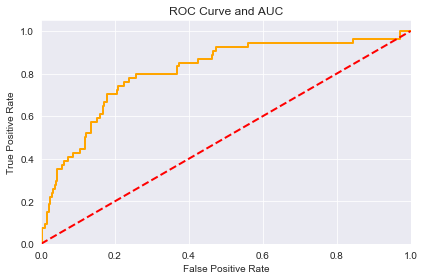

---------------------------------------------------------------------------
 Ketamine 
Drug user percent: 18.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.3072916666666667
Recall: 0.7023809523809523
Accuracy: 0.6652542372881356
F1_Score: 0.427536231884058


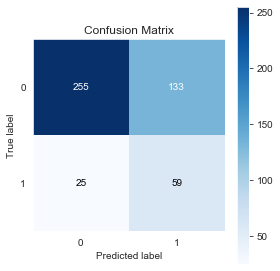


AUC: 0.7616593028964164


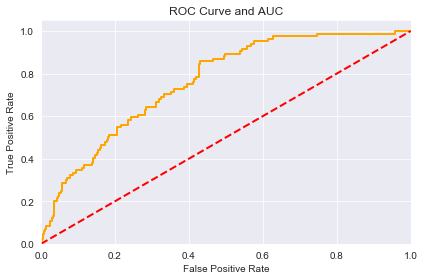

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.19571045576407506
Recall: 0.8690476190476191
Accuracy: 0.3411016949152542
F1_Score: 0.3194748358862145


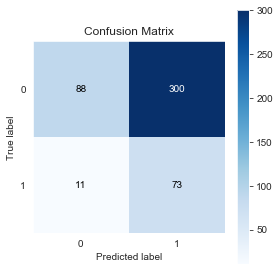


AUC: 0.6664058664702995


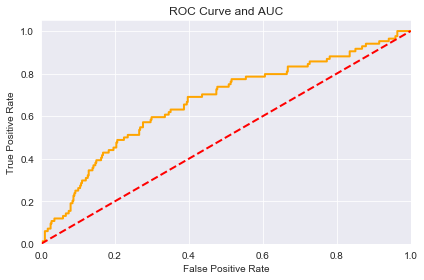

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.2550335570469799
Recall: 0.4523809523809524
Accuracy: 0.6673728813559322
F1_Score: 0.3261802575107296


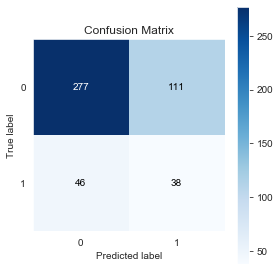


AUC: 0.5831492390770742


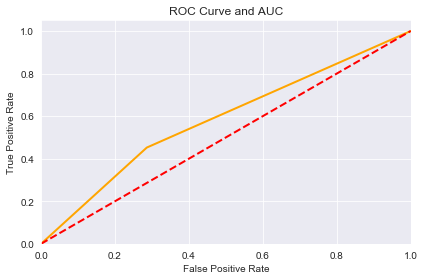

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.26229508196721313
Recall: 0.38095238095238093
Accuracy: 0.6991525423728814
F1_Score: 0.3106796116504854


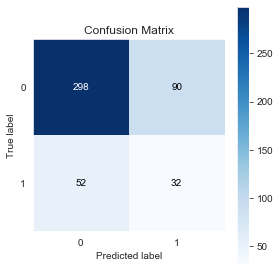


AUC: 0.5744968090328914


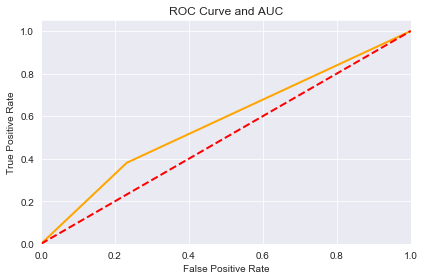

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.4482758620689655
Recall: 0.30952380952380953
Accuracy: 0.809322033898305
F1_Score: 0.3661971830985915


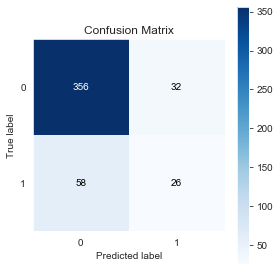


AUC: 0.7316672803141875


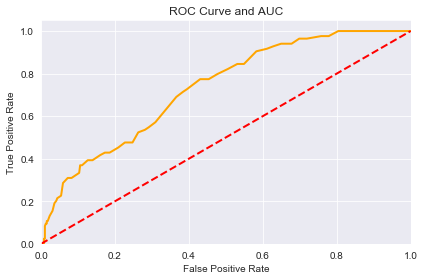

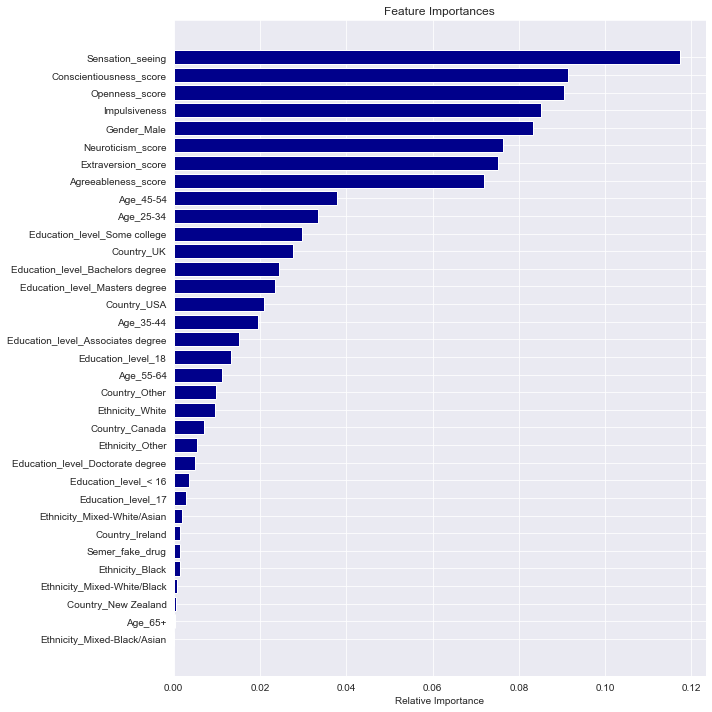

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.30434782608695654
Recall: 0.6666666666666666
Accuracy: 0.6694915254237288
F1_Score: 0.41791044776119407


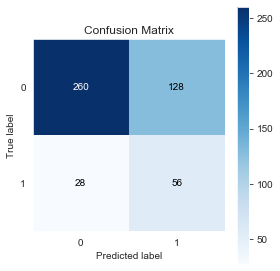


AUC: 0.7442317133038783


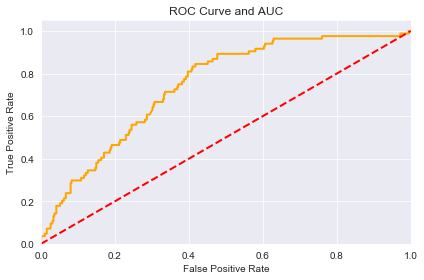

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.2893401015228426
Recall: 0.6785714285714286
Accuracy: 0.6461864406779662
F1_Score: 0.40569395017793597


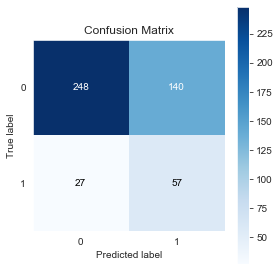

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.25
Recall: 0.6547619047619048
Accuracy: 0.5889830508474576
F1_Score: 0.3618421052631579


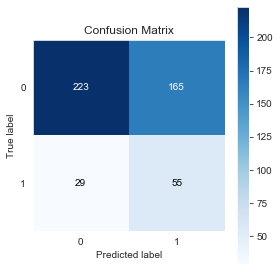


AUC: 0.7095299459990182


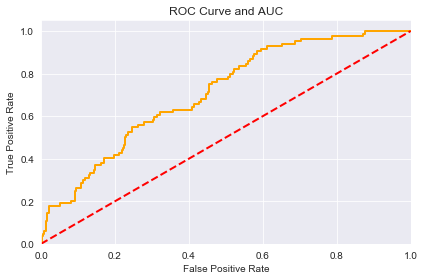

---------------------------------------------------------------------------
 Legal_highs 
Drug user percent: 40.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.7142857142857143
Recall: 0.7631578947368421
Accuracy: 0.7817796610169492
F1_Score: 0.737913486005089


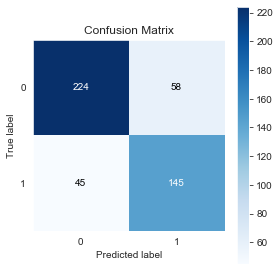


AUC: 0.8438783128032847


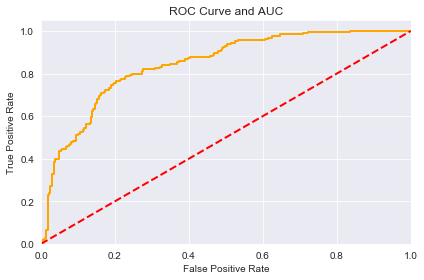

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.4956268221574344
Recall: 0.8947368421052632
Accuracy: 0.5911016949152542
F1_Score: 0.6378986866791745


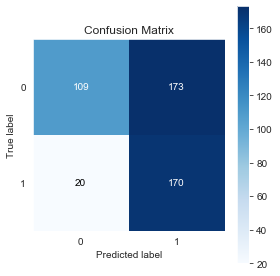


AUC: 0.7594811496827174


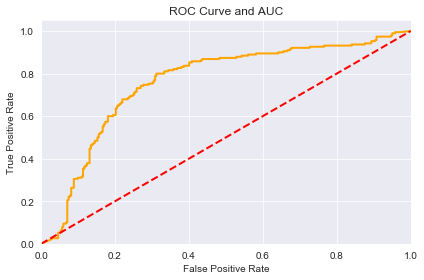

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.6210045662100456
Recall: 0.7157894736842105
Accuracy: 0.7097457627118644
F1_Score: 0.6650366748166259


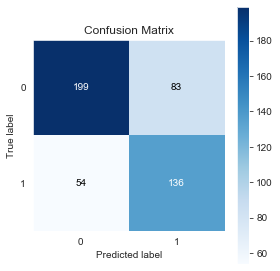


AUC: 0.7107316162747294


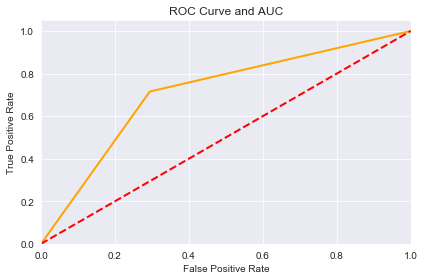

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.625
Recall: 0.6052631578947368
Accuracy: 0.6949152542372882
F1_Score: 0.6149732620320856


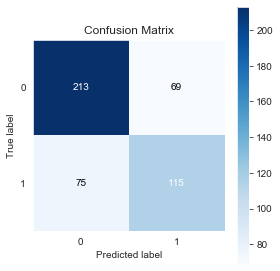


AUC: 0.6802911534154534


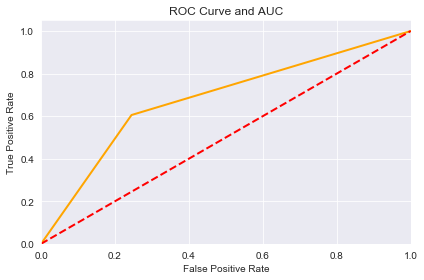

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.7180851063829787
Recall: 0.7105263157894737
Accuracy: 0.7711864406779662
F1_Score: 0.7142857142857143


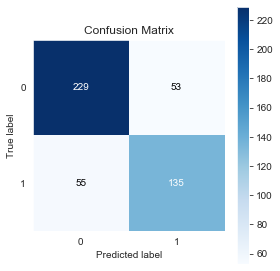


AUC: 0.8407241508025383


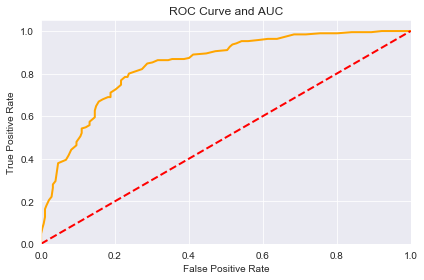

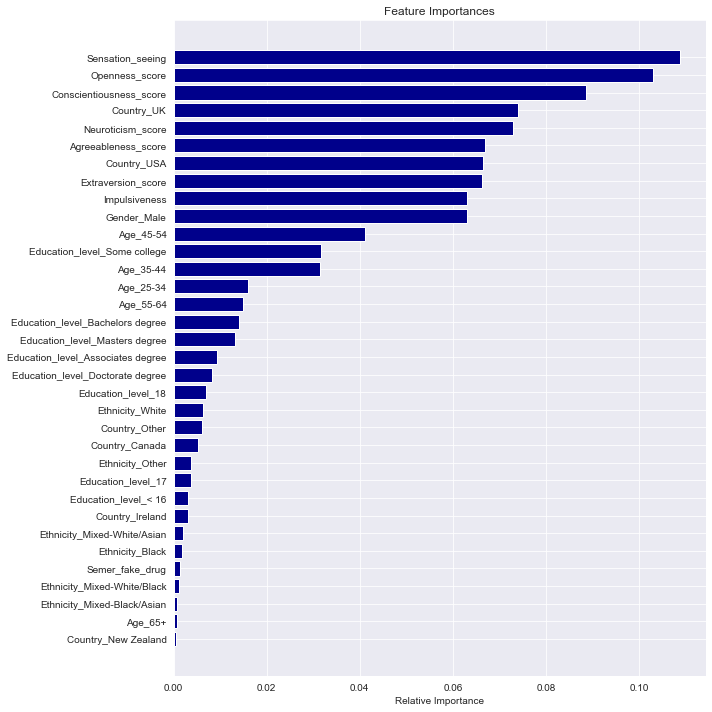

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.7028301886792453
Recall: 0.7842105263157895
Accuracy: 0.7796610169491526
F1_Score: 0.7412935323383085


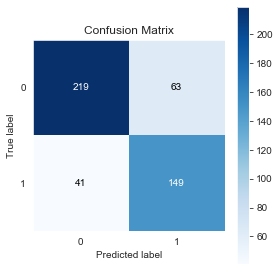


AUC: 0.8477790220231429


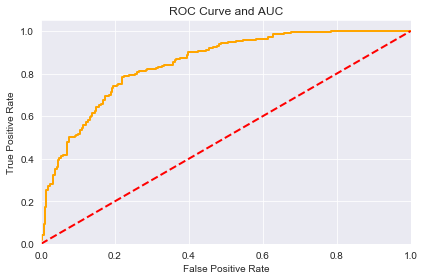

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.7093596059113301
Recall: 0.7578947368421053
Accuracy: 0.777542372881356
F1_Score: 0.732824427480916


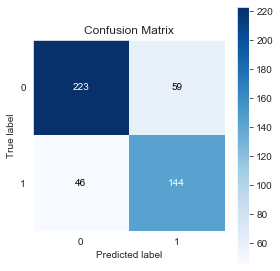

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.7405405405405405
Recall: 0.7210526315789474
Accuracy: 0.7860169491525424
F1_Score: 0.7306666666666667


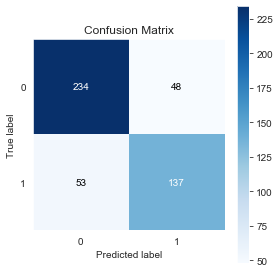


AUC: 0.8393990294886151


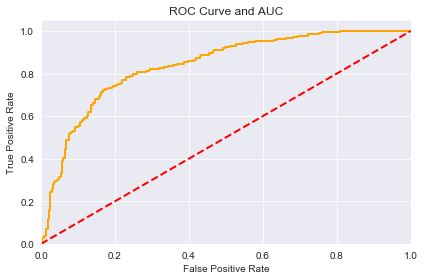

---------------------------------------------------------------------------
 LSD 
Drug user percent: 30.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.5979381443298969
Recall: 0.8285714285714286
Accuracy: 0.7838983050847458
F1_Score: 0.6946107784431138


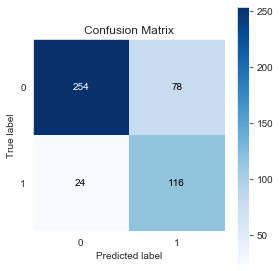


AUC: 0.8603485370051634


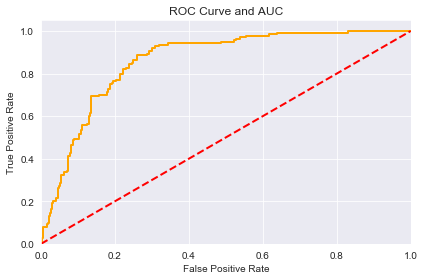

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.6141732283464567
Recall: 0.5571428571428572
Accuracy: 0.7648305084745762
F1_Score: 0.5842696629213483


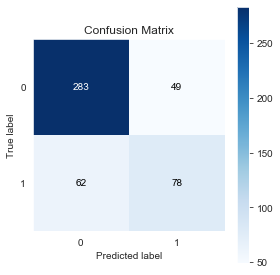


AUC: 0.8081110154905335


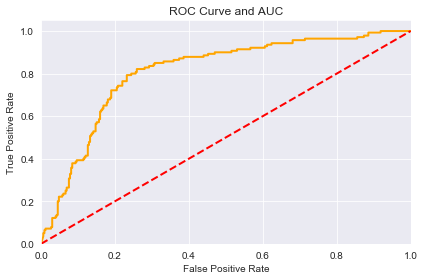

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.53125
Recall: 0.6071428571428571
Accuracy: 0.7245762711864406
F1_Score: 0.5666666666666667


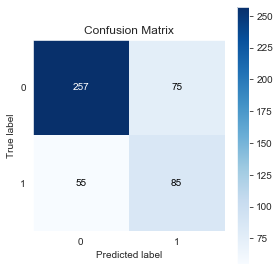


AUC: 0.690619621342513


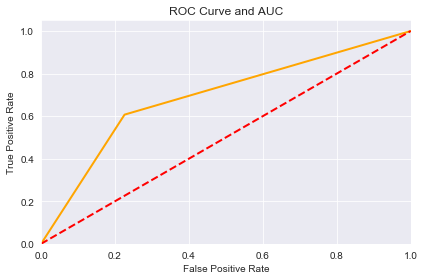

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.5068493150684932
Recall: 0.5285714285714286
Accuracy: 0.7076271186440678
F1_Score: 0.5174825174825174


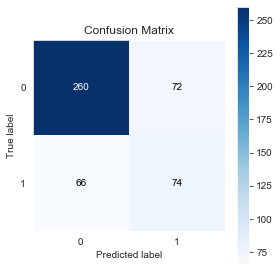


AUC: 0.6558519793459552


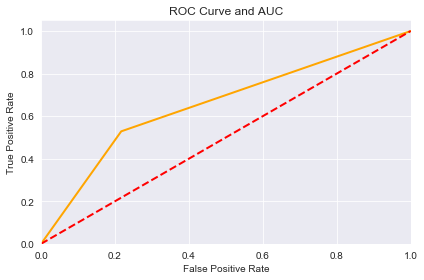

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.6515151515151515
Recall: 0.6142857142857143
Accuracy: 0.788135593220339
F1_Score: 0.6323529411764707


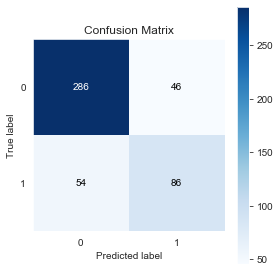


AUC: 0.8487736660929432


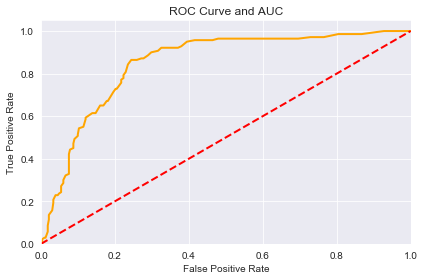

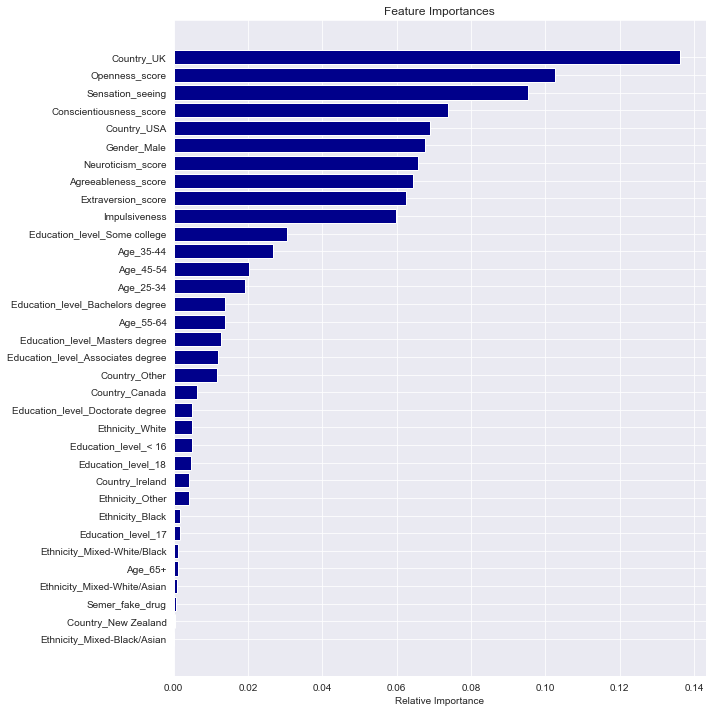

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.6043956043956044
Recall: 0.7857142857142857
Accuracy: 0.7838983050847458
F1_Score: 0.6832298136645962


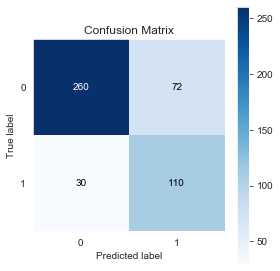


AUC: 0.8475043029259897


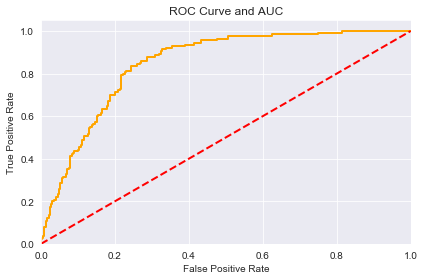

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.5858585858585859
Recall: 0.8285714285714286
Accuracy: 0.7754237288135594
F1_Score: 0.6863905325443788


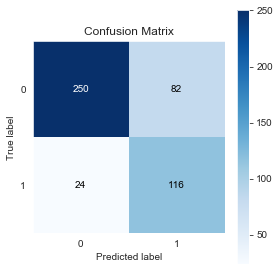

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.5137614678899083
Recall: 0.8
Accuracy: 0.7161016949152542
F1_Score: 0.6256983240223464


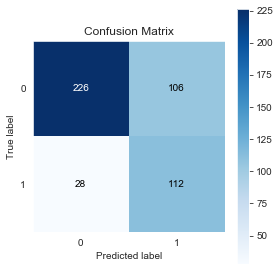


AUC: 0.8035499139414801


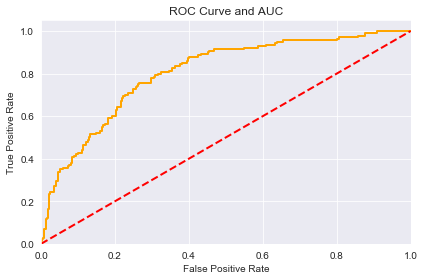

---------------------------------------------------------------------------
 Meth 
Drug user percent: 23.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.45251396648044695
Recall: 0.7363636363636363
Accuracy: 0.7309322033898306
F1_Score: 0.560553633217993


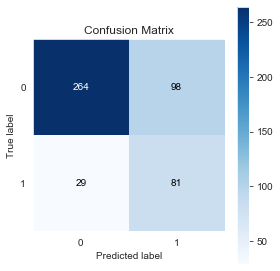


AUC: 0.8065796082370669


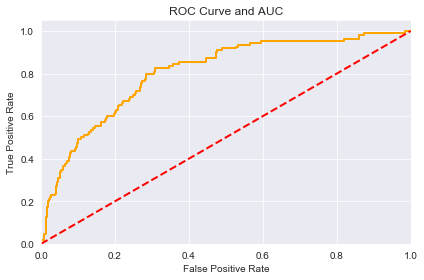

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.2506203473945409
Recall: 0.9181818181818182
Accuracy: 0.3411016949152542
F1_Score: 0.3937621832358674


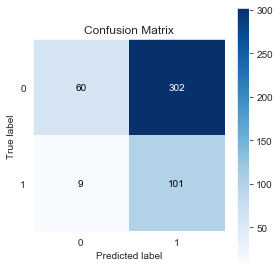


AUC: 0.7413862380713209


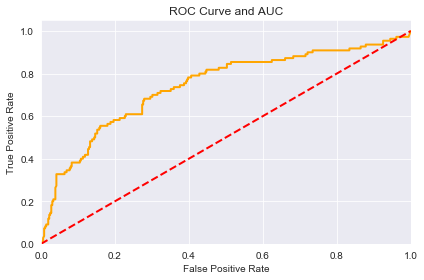

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.4
Recall: 0.5454545454545454
Accuracy: 0.7033898305084746
F1_Score: 0.4615384615384615


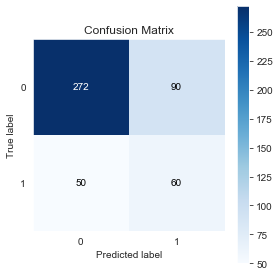


AUC: 0.6484178804620794


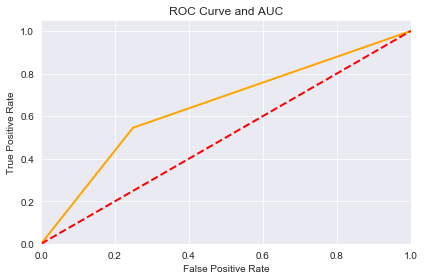

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.34814814814814815
Recall: 0.42727272727272725
Accuracy: 0.6800847457627118
F1_Score: 0.38367346938775515


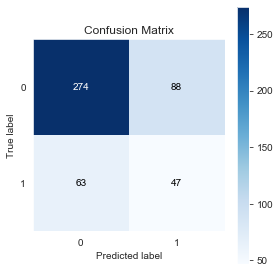


AUC: 0.5920894023103968


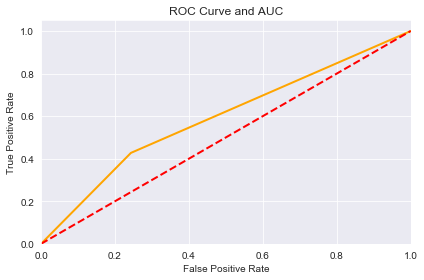

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.5360824742268041
Recall: 0.4727272727272727
Accuracy: 0.7817796610169492
F1_Score: 0.502415458937198


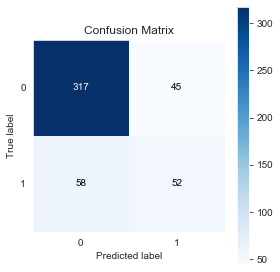


AUC: 0.8041687594173783


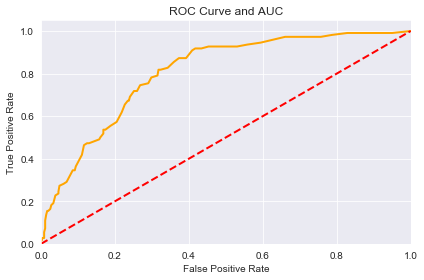

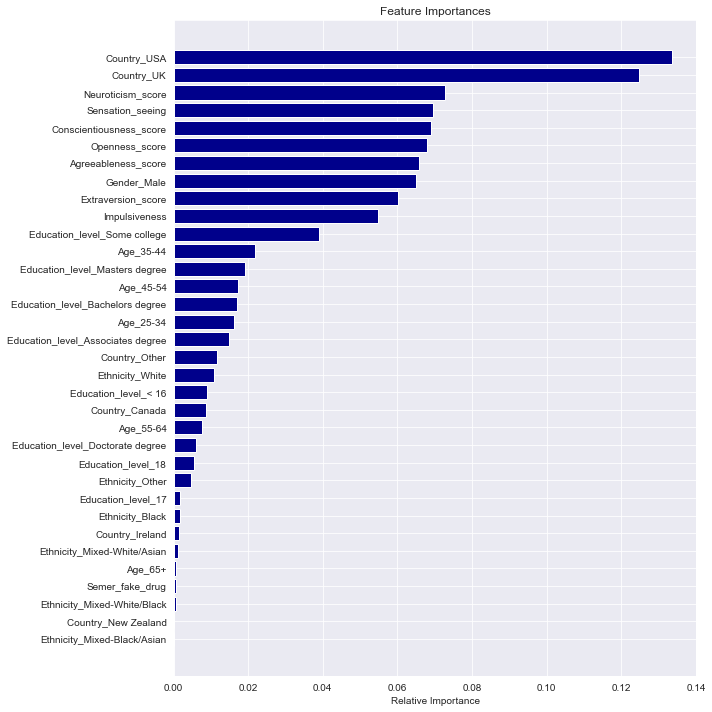

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.48148148148148145
Recall: 0.7090909090909091
Accuracy: 0.7542372881355932
F1_Score: 0.5735294117647058


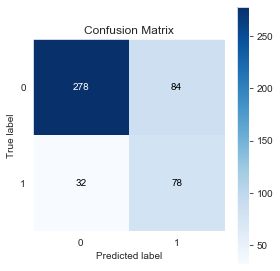


AUC: 0.8149171270718232


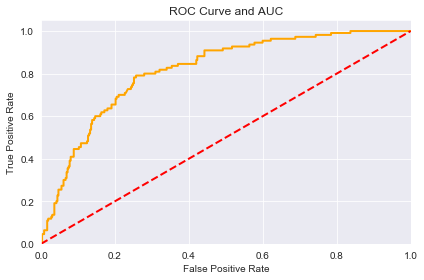

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.4659090909090909
Recall: 0.7454545454545455
Accuracy: 0.7415254237288136
F1_Score: 0.5734265734265734


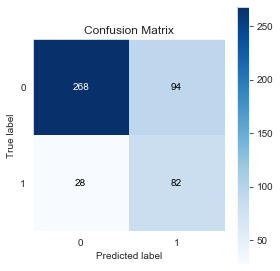

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.4307692307692308
Recall: 0.7636363636363637
Accuracy: 0.7097457627118644
F1_Score: 0.5508196721311476


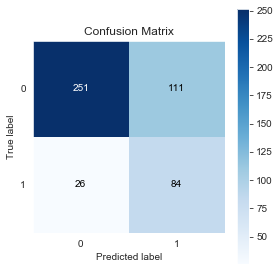


AUC: 0.7765946760421899


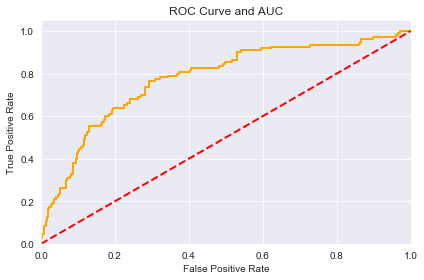

---------------------------------------------------------------------------
 Mushrooms 
Drug user percent: 39.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.6842105263157895
Recall: 0.7814207650273224
Accuracy: 0.7754237288135594
F1_Score: 0.7295918367346937


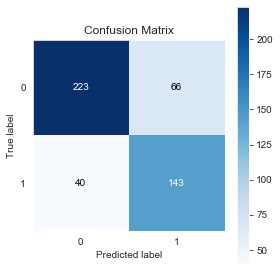


AUC: 0.8367840868266304


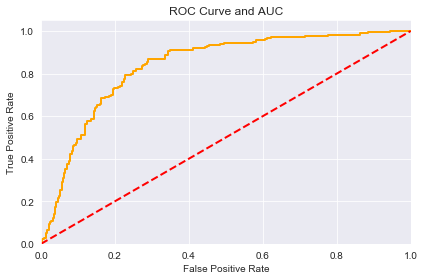

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.7592592592592593
Recall: 0.44808743169398907
Accuracy: 0.7309322033898306
F1_Score: 0.563573883161512


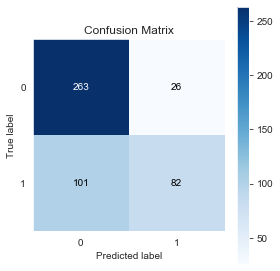


AUC: 0.7949968801406774


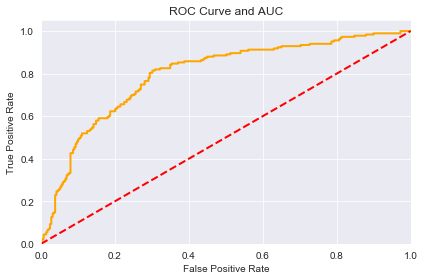

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.5939086294416244
Recall: 0.639344262295082
Accuracy: 0.690677966101695
F1_Score: 0.6157894736842104


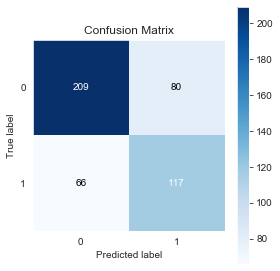


AUC: 0.6812638266492711


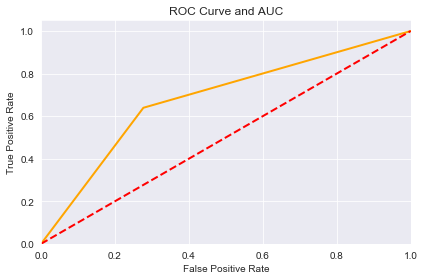

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.5642458100558659
Recall: 0.5519125683060109
Accuracy: 0.6610169491525424
F1_Score: 0.5580110497237568


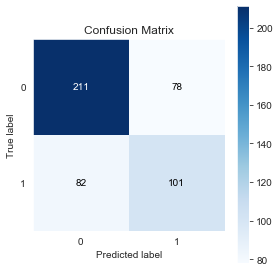


AUC: 0.6410081872671922


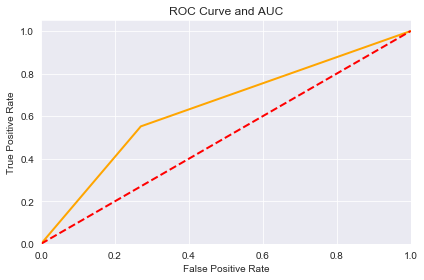

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.7262569832402235
Recall: 0.7103825136612022
Accuracy: 0.7838983050847458
F1_Score: 0.718232044198895


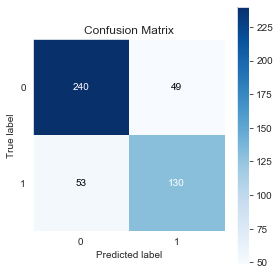


AUC: 0.8360277572938528


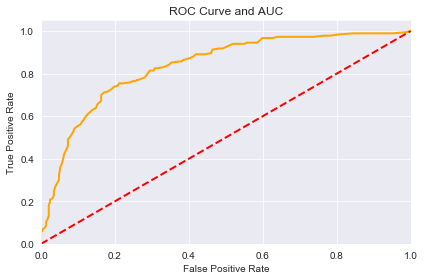

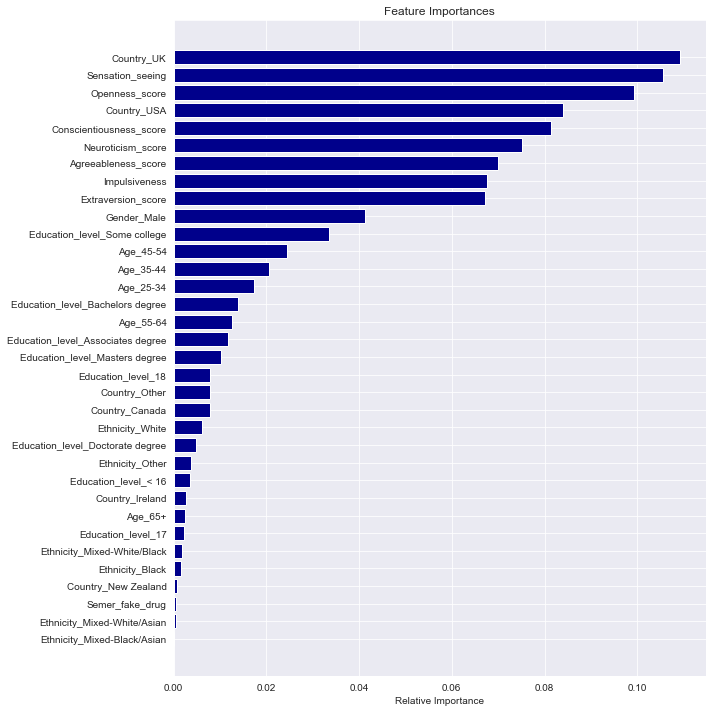

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.6650943396226415
Recall: 0.7704918032786885
Accuracy: 0.760593220338983
F1_Score: 0.7139240506329114


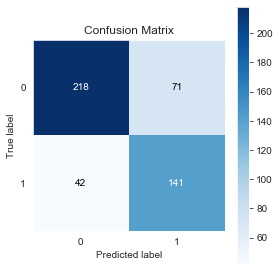


AUC: 0.8418136782196003


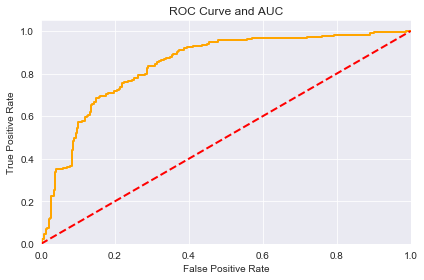

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.6780487804878049
Recall: 0.7595628415300546
Accuracy: 0.7669491525423728
F1_Score: 0.7164948453608249


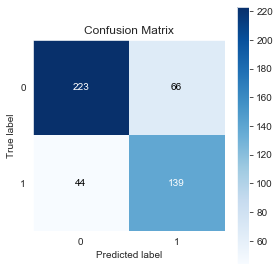

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.6766169154228856
Recall: 0.7431693989071039
Accuracy: 0.7627118644067796
F1_Score: 0.7083333333333335


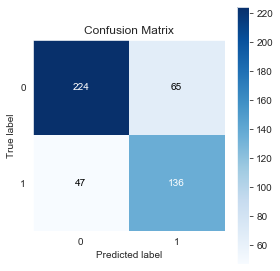


AUC: 0.8302418363681054


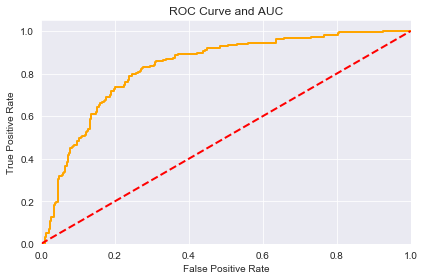

---------------------------------------------------------------------------
 Nicotine 
Drug user percent: 67.0%

Logisitic Regression Results:

Model Metrics:
Precision: 0.8346153846153846
Recall: 0.6845425867507886
Accuracy: 0.6970338983050848
F1_Score: 0.7521663778162913


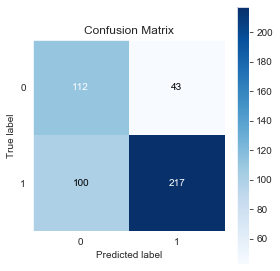


AUC: 0.7454767477358298


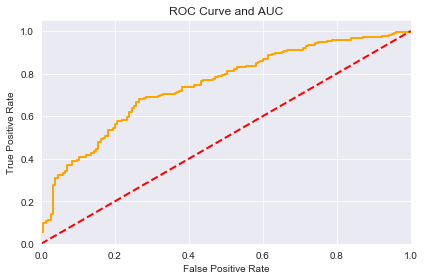

---------------------------------------------------------------------------
Naive Bayes - Gaussian Results:

Model Metrics:
Precision: 0.8210526315789474
Recall: 0.24605678233438485
Accuracy: 0.4576271186440678
F1_Score: 0.3786407766990292


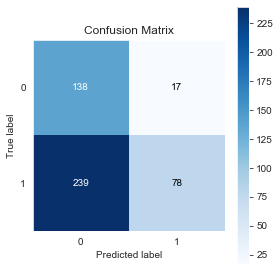


AUC: 0.7169024117228044


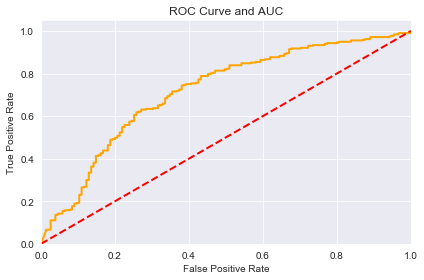

---------------------------------------------------------------------------
K-Nearest Neighbors Results:

Model Metrics:
Precision: 0.7195945945945946
Recall: 0.6719242902208202
Accuracy: 0.6038135593220338
F1_Score: 0.6949429037520393


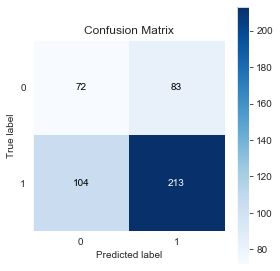


AUC: 0.5682202096265392


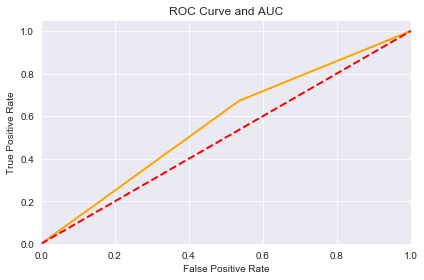

---------------------------------------------------------------------------
Decision Tree Results:

Model Metrics:
Precision: 0.7750865051903114
Recall: 0.7066246056782335
Accuracy: 0.6652542372881356
F1_Score: 0.7392739273927393


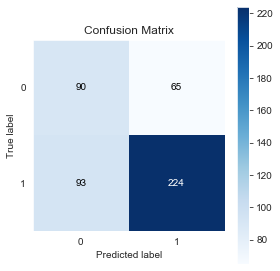


AUC: 0.643634883484278


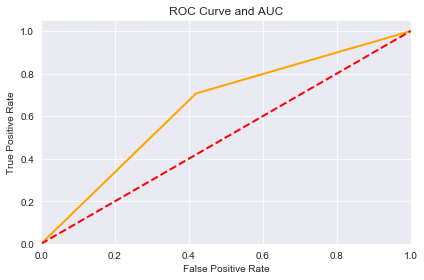

---------------------------------------------------------------------------
Random Forest Results:

Model Metrics:
Precision: 0.7708978328173375
Recall: 0.7854889589905363
Accuracy: 0.6991525423728814
F1_Score: 0.7781250000000001


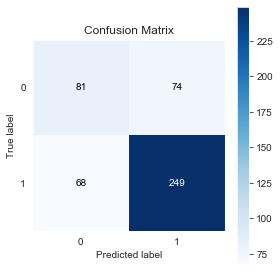


AUC: 0.7423628777856925


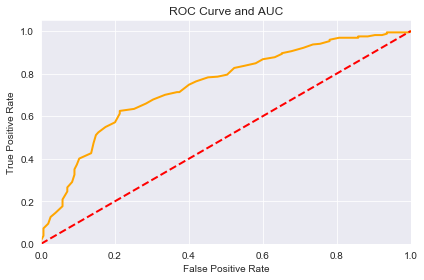

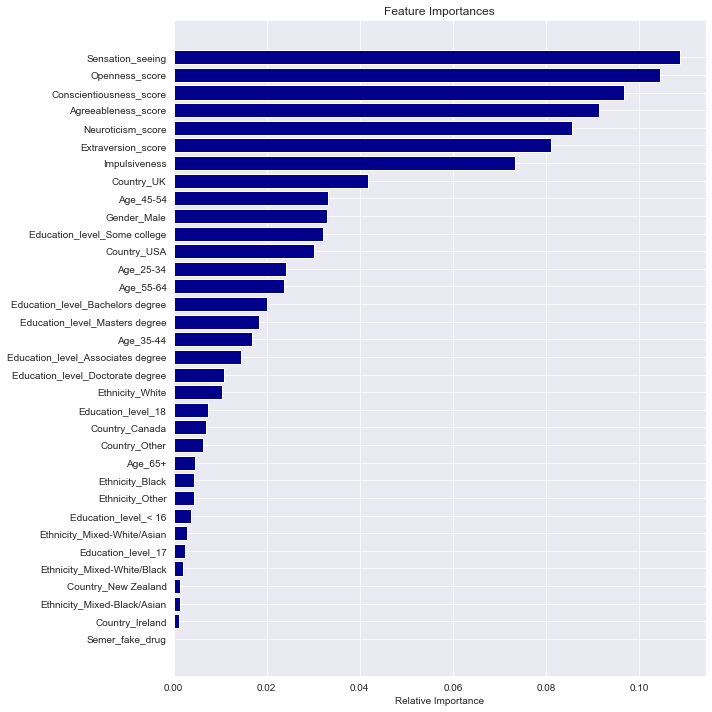

---------------------------------------------------------------------------
SVC Results:

Model Metrics:
Precision: 0.8075471698113208
Recall: 0.6750788643533123
Accuracy: 0.673728813559322
F1_Score: 0.7353951890034365


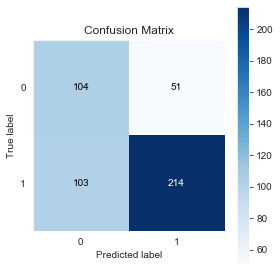


AUC: 0.7346901394118246


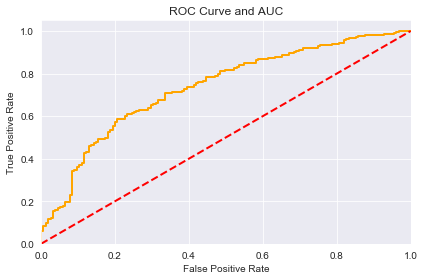

---------------------------------------------------------------------------
Linear SVC Results:

Model Metrics:
Precision: 0.8307692307692308
Recall: 0.6813880126182965
Accuracy: 0.6927966101694916
F1_Score: 0.7487001733102253


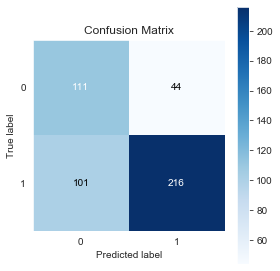

---------------------------------------------------------------------------
SGD Results:

Model Metrics:
Precision: 0.8256410256410256
Recall: 0.5078864353312302
Accuracy: 0.597457627118644
F1_Score: 0.6289062499999999


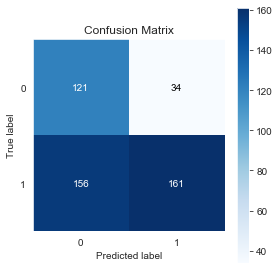


AUC: 0.6819375190800854


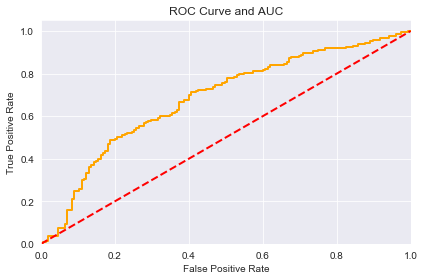

---------------------------------------------------------------------------


In [26]:
# Run all models for each drug and create a dataframe for each drug
drug_use_dfs_dict = {}
for key in drug_dict.keys():
    start = "\033[1m"
    end = "\033[0;0m"
    print(start, key[:-3], end)
    final_df = modeling_steps(drug_dict[key])
    drug_use_dfs_dict[key[:-3]] = final_df

### Model Insights and Final Analysis

In [28]:
# Reset index of each dataframe and combine into one full dataframe
full_df = pd.DataFrame()
for key in drug_use_dfs_dict.keys():
    df = drug_use_dfs_dict[key]
    df['Drug'] = [key for i in range(len(df))]
    full_df = pd.concat([full_df, df], join = 'outer')
full_df.reset_index(drop = True, inplace = True)
full_df = full_df[['Drug', 'Model', 'Metric', 'Score']]
full_df

Drug                Model     Metric     Score
0     Alcohol  Logistic_Regression  Precision  0.979104
1     Alcohol  Logistic_Regression     Recall  0.727273
2     Alcohol  Logistic_Regression   Accuracy  0.724576
3     Alcohol  Logistic_Regression   F1_Score  0.834606
4     Alcohol  Logistic_Regression        AUC  0.761799
..        ...                  ...        ...       ...
658  Nicotine                  SGD  Precision  0.825641
659  Nicotine                  SGD     Recall  0.507886
660  Nicotine                  SGD   Accuracy  0.597458
661  Nicotine                  SGD   F1_Score  0.628906
662  Nicotine                  SGD        AUC  0.681938

[663 rows x 4 columns]

In [29]:
# Output clean final dataframe to csv for backup use
full_df.to_csv('Drug_classifier_scores_df.csv')

In [30]:
# Load in data to check and further modify
drug_classifier_scores_df = pd.read_csv('Drug_classifier_scores_df.csv', index_col = 'Unnamed: 0')
drug_classifier_scores_df

Drug                Model     Metric     Score
0     Alcohol  Logistic_Regression  Precision  0.979104
1     Alcohol  Logistic_Regression     Recall  0.727273
2     Alcohol  Logistic_Regression   Accuracy  0.724576
3     Alcohol  Logistic_Regression   F1_Score  0.834606
4     Alcohol  Logistic_Regression        AUC  0.761799
..        ...                  ...        ...       ...
658  Nicotine                  SGD  Precision  0.825641
659  Nicotine                  SGD     Recall  0.507886
660  Nicotine                  SGD   Accuracy  0.597458
661  Nicotine                  SGD   F1_Score  0.628906
662  Nicotine                  SGD        AUC  0.681938

[663 rows x 4 columns]

In [31]:
# Create list of drug and metric combinations
import itertools
drug_list = list(total_drug_use_dict.keys())
metric_list = ['AUC', 'Accuracy', 'Recall', 'Precision', 'F1_Score']
combo_list = list(itertools.product(drug_list, metric_list))

In [32]:
# Generate a dictionary with drug/metric combination keys and best performing model/score values
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

max_drug_metric_model_dict = {}
for combo in combo_list:
    q = f"""SELECT Model, Score FROM drug_classifier_scores_df
            WHERE Drug = {"'" + combo[0] + "'"} AND Metric = {"'" + combo[1] + "'"}
            ORDER BY Score DESC
            LIMIT 1"""
    result = pysqldf(q)
    max_drug_metric_model_dict[combo] = (result.iloc[0]['Model'], round(result.iloc[0]['Score'] * 100 ,2))
max_drug_metric_model_dict

{('Alcohol', 'AUC'): ('Logistic_Regression', 76.18),
 ('Alcohol', 'Accuracy'): ('Random_Forest', 95.55),
 ('Alcohol', 'Recall'): ('Random_Forest', 99.78),
 ('Alcohol', 'Precision'): ('SGD', 98.92),
 ('Alcohol', 'F1_Score'): ('Random_Forest', 97.72),
 ('Amphet', 'AUC'): ('Logistic_Regression', 78.66),
 ('Amphet', 'Accuracy'): ('Random_Forest', 72.88),
 ('Amphet', 'Recall'): ('NB_Gaussian', 92.12),
 ('Amphet', 'Precision'): ('Random_Forest', 60.82),
 ('Amphet', 'F1_Score'): ('SVC', 64.8),
 ('Amyl', 'AUC'): ('Logistic_Regression', 72.48),
 ('Amyl', 'Accuracy'): ('Random_Forest', 79.66),
 ('Amyl', 'Recall'): ('NB_Gaussian', 94.38),
 ('Amyl', 'Precision'): ('Random_Forest', 42.55),
 ('Amyl', 'F1_Score'): ('Logistic_Regression', 46.74),
 ('Benzos', 'AUC'): ('Logistic_Regression', 70.72),
 ('Benzos', 'Accuracy'): ('Logistic_Regression', 67.16),
 ('Benzos', 'Recall'): ('Logistic_Regression', 65.48),
 ('Benzos', 'Precision'): ('SGD', 60.78),
 ('Benzos', 'F1_Score'): ('Logistic_Regression', 62.4

## Conclusions
Personality and demographic traits can help determine susceptibility to using a certain drug. Having the ability to pick a model based on drug of interest and performance metric helps generate quick reliable results. Rehab clinics, hospitals, and more can benefit from these model insights to create effective tailored treatment plans for individuals. Users would be able to use the dictionary above to pick a metric they would like to optimize for a given drug and find the best model to use for those results.